In [1]:
!pip install psycopg2

Access is denied.


Variable               = Definition
id	                   = Unique ID for the customer
Gender                 = Gender of the customer
Age                    = Age of the customer
Driving_License	       = 0  Customer does not have DL, 1 : Customer already has DL
Region_Code	           = Unique code for the region of the customer
Previously_Insured	   = 1  Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
Vehicle_Age	           = Age of the Vehicle
Vehicle_Damage	       = 1   Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
Annual_Premium         = The amount customer needs to pay as premium in the year
PolicySalesChannel	   = Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
Vintage	Number of Days = Customer has been associated with the company
Response               =1 : Customer is interested, 0 : Customer is not interested

In [2]:
!pip install xgboost

Access is denied.


In [3]:
#Standard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Connect PoSTGsql
import psycopg2
from urllib.parse import urlparse

#ML 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [4]:
param={
    'dbname':'Sigorta',
    'user': 'postgres',
    'password': 'Masal2020',
    'port': 5432,
    'host': 'localhost'
}
connection = psycopg2.connect(**param )

In [5]:
pd.read_sql('Select * from public.train',connection)

C:\Users\Sifa\AppData\Local\Temp\ipykernel_20688\738658128.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql('Select * from public.train',connection)


id  gender  age  driving_license  region_code  previously_insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0   

       vehicle_age vehicle_damage  annual_premium  policy_sales_channel  \
0        > 2 Years            Yes         40454.0                  26.0   
1         1-2 Year             No         33536.0                  26.0   
2        > 2 Years            Yes         38294.0                  26.0   
3         < 1 Year             No         28619.0                 152.0   
4         < 1 Year             No         27496.0                 152.0   
...            ...            ...             ...                   ...   
381104    1-2 Year             No         30170.0                  26.0   
381105    < 1 Year             No         40016.0                 152.0   
381106    < 1 Year             No         35118.0                 160.0   
381107   > 2 Years            Yes         44617.0                 124.0   
381108    1-2 Year             No         41777.0                  26.0   

        vintage  response  
0           217         1  
1           183         0  
2            27         1  
3           203         0  
4            39         0  
...         ...       ...  
381104       88         0  
381105      131         0  
381106      161         0  
381107       74         0  
381108      237         0  

[381109 rows x 12 columns]

In [6]:
pd.read_sql('Select count(distinct(id))  from public.train',connection)

C:\Users\Sifa\AppData\Local\Temp\ipykernel_20688\3949052928.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql('Select count(distinct(id))  from public.train',connection)


count
0  381109

In [7]:
pd.read_sql('Select count(*),age  from public.train group by age ',connection)

C:\Users\Sifa\AppData\Local\Temp\ipykernel_20688\3325427769.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql('Select count(*),age  from public.train group by age ',connection)


count  age
0    6232   20
1   16457   21
2   20964   22
3   24256   23
4   25960   24
..    ...  ...
61     56   81
62     29   82
63     22   83
64     11   84
65     11   85

[66 rows x 2 columns]

In [8]:
pd.read_sql('Select count(*),gender from public.train group by gender ',connection)

C:\Users\Sifa\AppData\Local\Temp\ipykernel_20688\2696481198.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql('Select count(*),gender from public.train group by gender ',connection)


count  gender
0  175020  Female
1  206089    Male

In [9]:
pd.read_sql('Select count(previously_insured),age from public.train where previously_insured=0  group by  age',connection)

C:\Users\Sifa\AppData\Local\Temp\ipykernel_20688\3066477261.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql('Select count(previously_insured),age from public.train where previously_insured=0  group by  age',connection)


count  age
0    3734   20
1    7757   21
2    7853   22
3    7968   23
4    7990   24
..    ...  ...
61     28   81
62     15   82
63      8   83
64      2   84
65      7   85

[66 rows x 2 columns]

In [10]:
pd.read_sql('Select count(previously_insured),age from public.train where previously_insured=0 and response=1  group by  age',connection)

C:\Users\Sifa\AppData\Local\Temp\ipykernel_20688\3849771225.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql('Select count(previously_insured),age from public.train where previously_insured=0 and response=1  group by  age',connection)


count  age
0     168   20
1     569   21
2     755   22
3     887   23
4     900   24
..    ...  ...
59     60   79
60     59   80
61      4   81
62      1   82
63      1   83

[64 rows x 2 columns]

###Create Dataset

In [11]:
train_df = pd.read_sql('Select id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response from public.train',connection)
test_df = pd.read_sql('Select gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage from public.test',connection)

C:\Users\Sifa\AppData\Local\Temp\ipykernel_20688\3539761128.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  train_df = pd.read_sql('Select id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response from public.train',connection)
C:\Users\Sifa\AppData\Local\Temp\ipykernel_20688\3539761128.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  test_df = pd.read_sql('Select gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage from public.test',connection)


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   gender                381109 non-null  object 
 2   age                   381109 non-null  int64  
 3   driving_license       381109 non-null  int64  
 4   region_code           381109 non-null  float64
 5   previously_insured    381109 non-null  int64  
 6   vehicle_age           381109 non-null  object 
 7   vehicle_damage        381109 non-null  object 
 8   annual_premium        381109 non-null  float64
 9   policy_sales_channel  381109 non-null  float64
 10  vintage               381109 non-null  int64  
 11  response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                127037 non-null  object 
 1   age                   127037 non-null  int64  
 2   driving_license       127037 non-null  int64  
 3   region_code           127037 non-null  float64
 4   previously_insured    127037 non-null  int64  
 5   vehicle_age           127037 non-null  object 
 6   vehicle_damage        127037 non-null  object 
 7   annual_premium        127037 non-null  float64
 8   policy_sales_channel  127037 non-null  float64
 9   vintage               127037 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 9.7+ MB


###Check NULL value

In [14]:
#Null Check
total = test_df.isnull().sum().sort_values(ascending=False)
percent_1 = test_df.isnull().sum()/test_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(12)

Total    %
gender                    0  0.0
age                       0  0.0
driving_license           0  0.0
region_code               0  0.0
previously_insured        0  0.0
vehicle_age               0  0.0
vehicle_damage            0  0.0
annual_premium            0  0.0
policy_sales_channel      0  0.0
vintage                   0  0.0

In [15]:
#Null Check
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(12)

Total    %
id                        0  0.0
gender                    0  0.0
age                       0  0.0
driving_license           0  0.0
region_code               0  0.0
previously_insured        0  0.0
vehicle_age               0  0.0
vehicle_damage            0  0.0
annual_premium            0  0.0
policy_sales_channel      0  0.0
vintage                   0  0.0
response                  0  0.0

##Exploratory Data Analysis

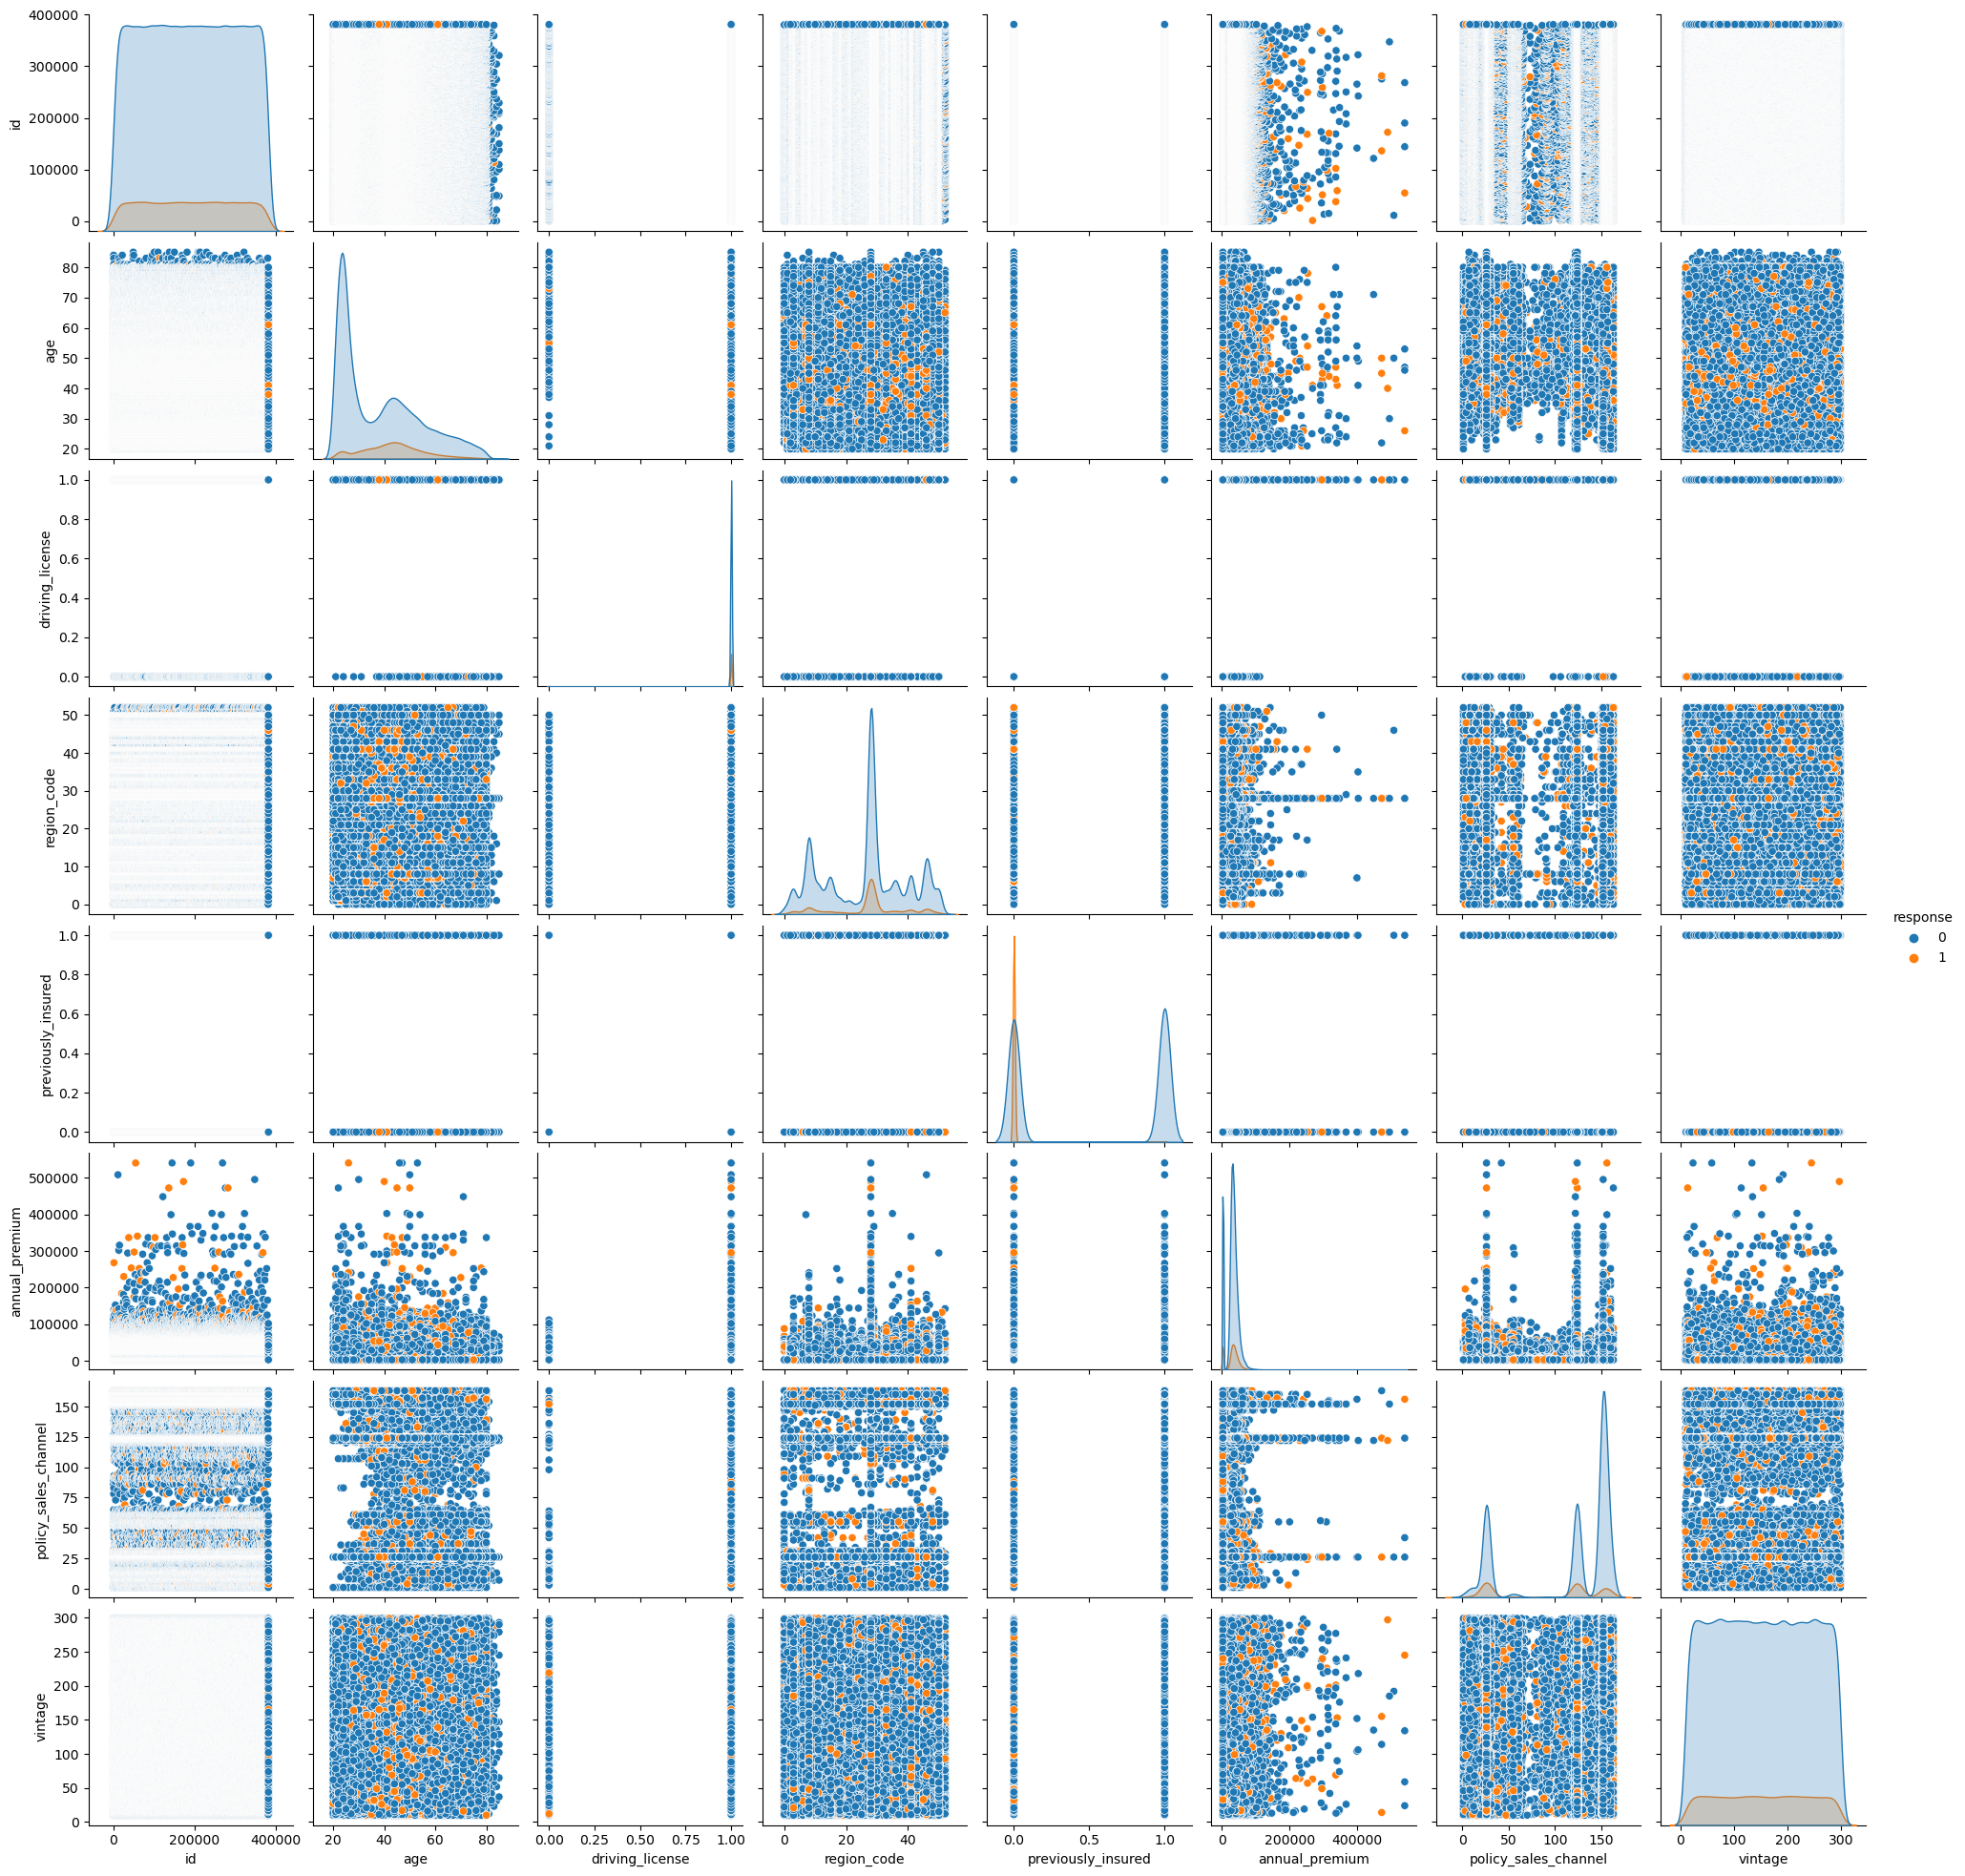

In [16]:
sns.pairplot(data=train_df, hue='response');

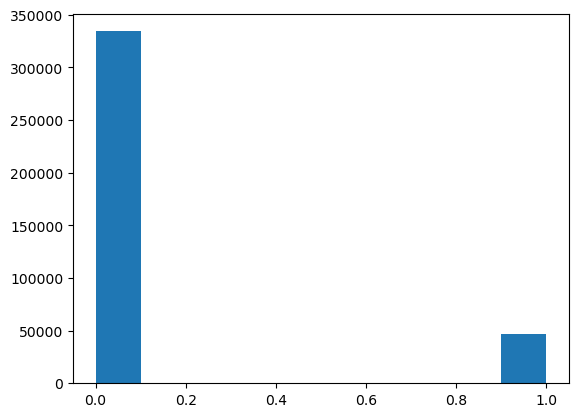

In [17]:
plt.hist(train_df.response);

In [18]:
train_df.response.value_counts(normalize=True)*100

0    87.743664
1    12.256336
Name: response, dtype: float64

In [19]:
train_df.describe().T

count           mean            std     min      25%  \
id                    381109.0  190555.000000  110016.836208     1.0  95278.0   
age                   381109.0      38.822584      15.511611    20.0     25.0   
driving_license       381109.0       0.997869       0.046110     0.0      1.0   
region_code           381109.0      26.388807      13.229888     0.0     15.0   
previously_insured    381109.0       0.458210       0.498251     0.0      0.0   
annual_premium        381109.0   30564.389581   17213.155057  2630.0  24405.0   
policy_sales_channel  381109.0     112.034295      54.203995     1.0     29.0   
vintage               381109.0     154.347397      83.671304    10.0     82.0   
response              381109.0       0.122563       0.327936     0.0      0.0   

                           50%       75%       max  
id                    190555.0  285832.0  381109.0  
age                       36.0      49.0      85.0  
driving_license            1.0       1.0       1.0  
region_code               28.0      35.0      52.0  
previously_insured         0.0       1.0       1.0  
annual_premium         31669.0   39400.0  540165.0  
policy_sales_channel     133.0     152.0     163.0  
vintage                  154.0     227.0     299.0  
response                   0.0       0.0       1.0

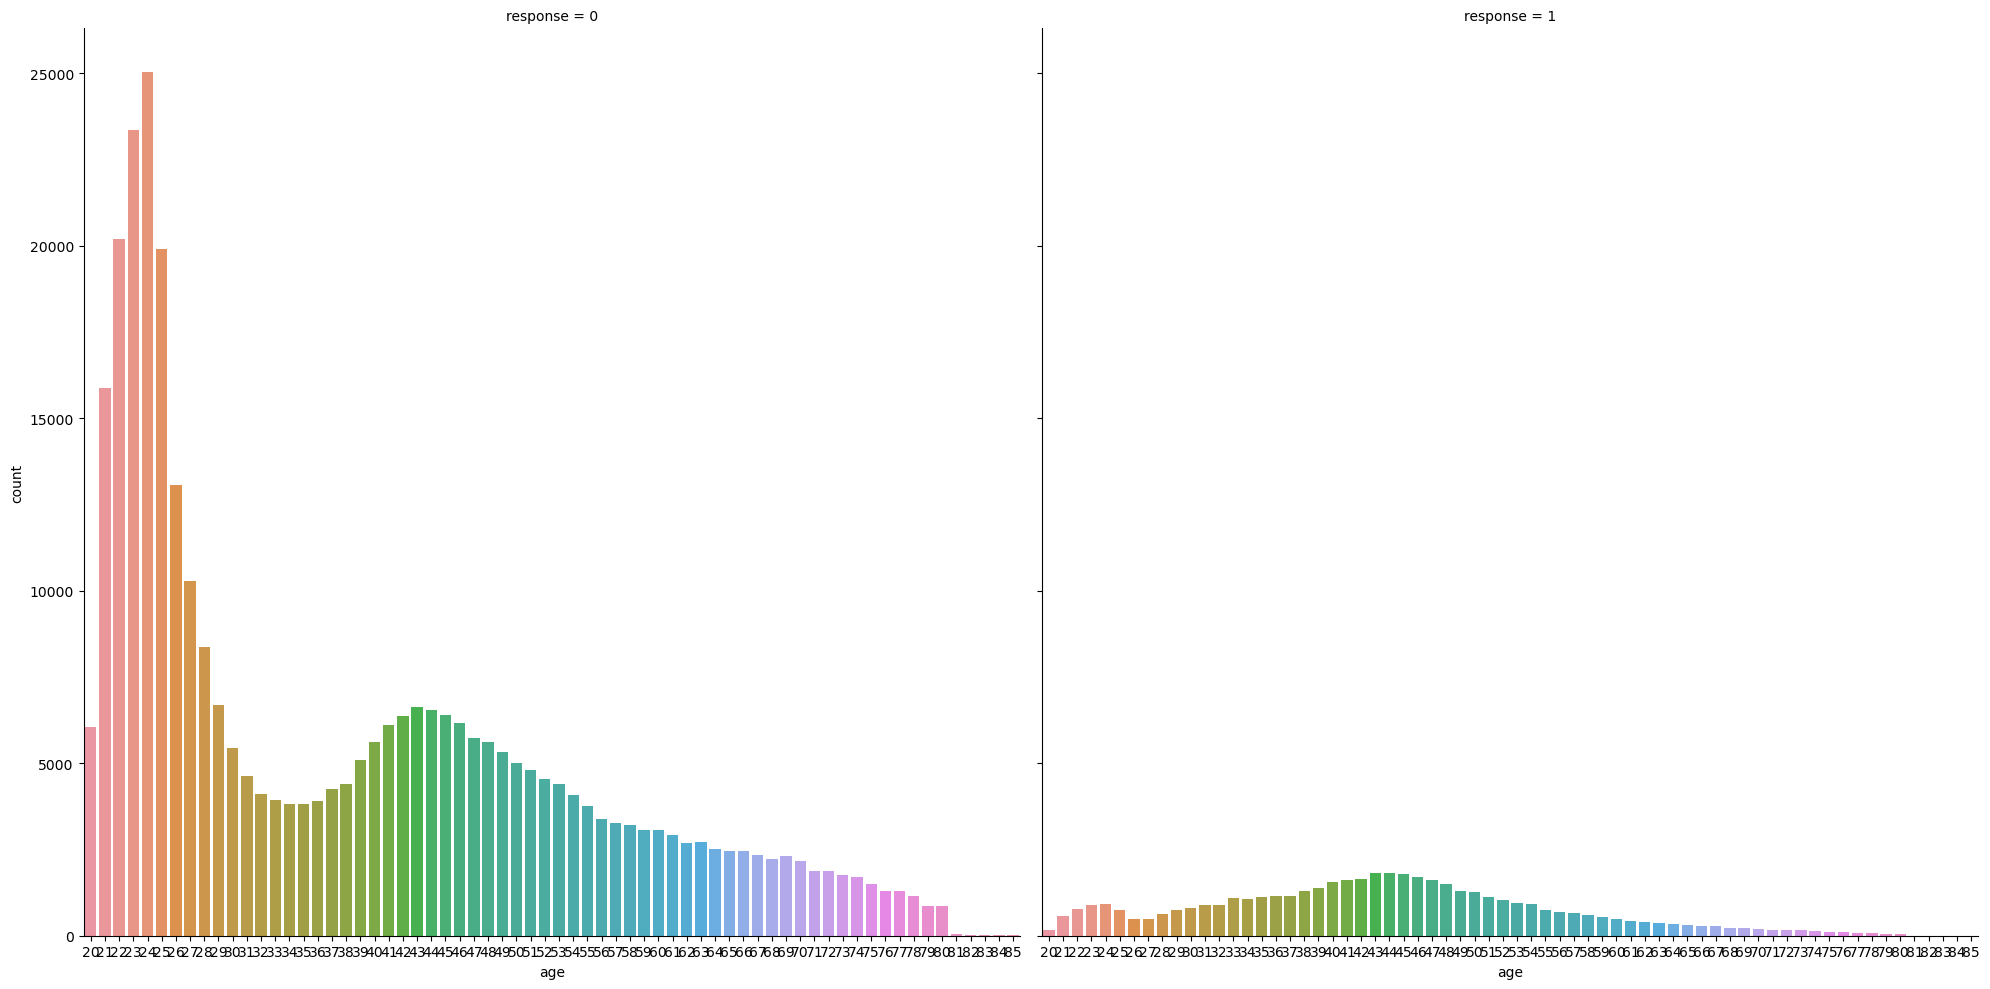

In [20]:
agedf=train_df.groupby(['age','response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
age = sns.catplot(x="age", y="count",col="response",
                data=agedf, kind="bar",
                height=10);

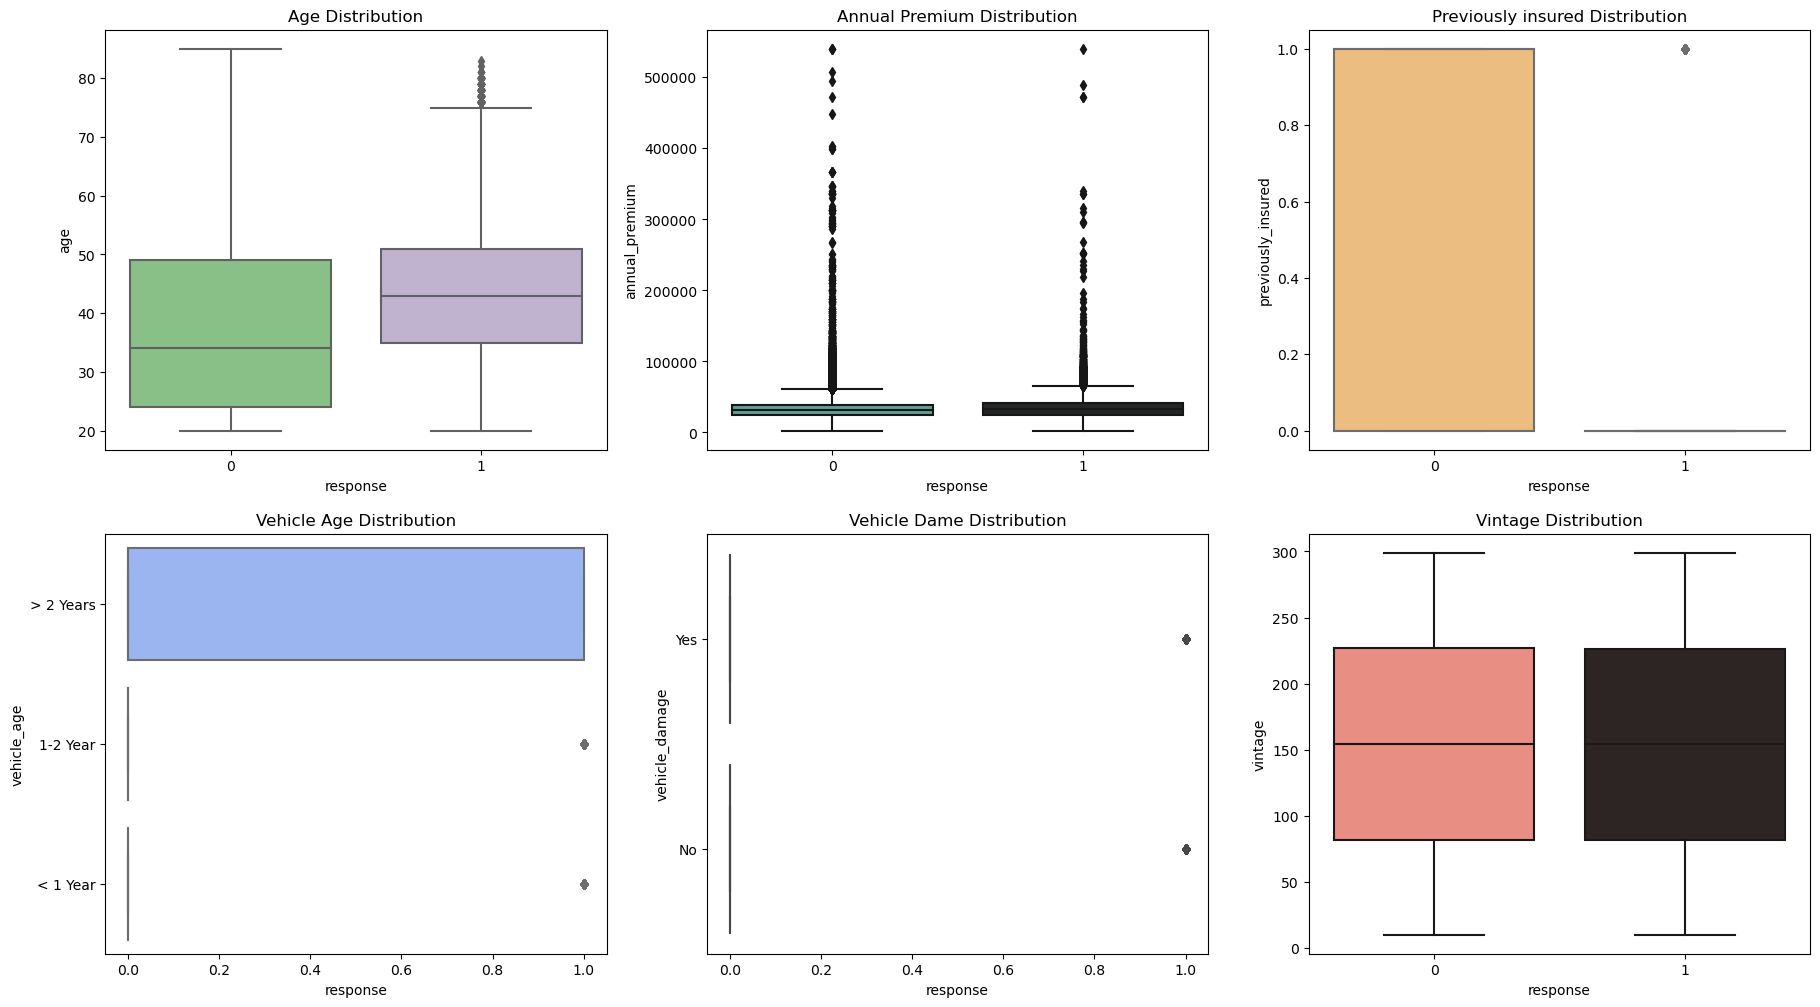

In [21]:
 fig, axes = plt.subplots(2, 3, figsize=(22,12))
sns.boxplot(ax=axes[0][0], y = 'age',x='response', data = train_df,palette='Accent').set(title='Age Distribution');
sns.boxplot(ax=axes[0][1], y = 'annual_premium',x='response', data = train_df,palette='dark:#5A9_r').set(title='Annual Premium Distribution');
sns.boxplot(ax=axes[0][2], y = 'previously_insured',x='response', data = train_df,palette='Spectral').set(title='Previously insured Distribution');
sns.boxplot(ax=axes[1][0], y = 'vehicle_age',x='response', data = train_df,palette='coolwarm').set(title='Vehicle Age Distribution');
sns.boxplot(ax=axes[1][1], y = 'vehicle_damage',x='response', data = train_df,palette='YlOrBr').set(title='Vehicle Dame Distribution');
sns.boxplot(ax=axes[1][2], y = 'vintage',x='response', data = train_df,palette='dark:salmon_r').set(title='Vintage Distribution');

##Gender Response distribution

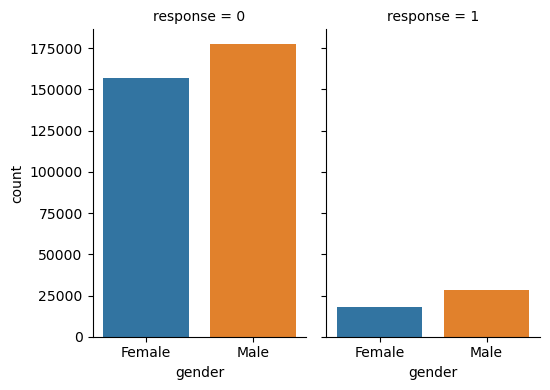

In [22]:
genderdf=train_df.groupby(['gender','response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
gender = sns.catplot(x="gender", y="count",col="response",
                data=genderdf, kind="bar",
                height=4, aspect=.7);

##Driving Licance distribution

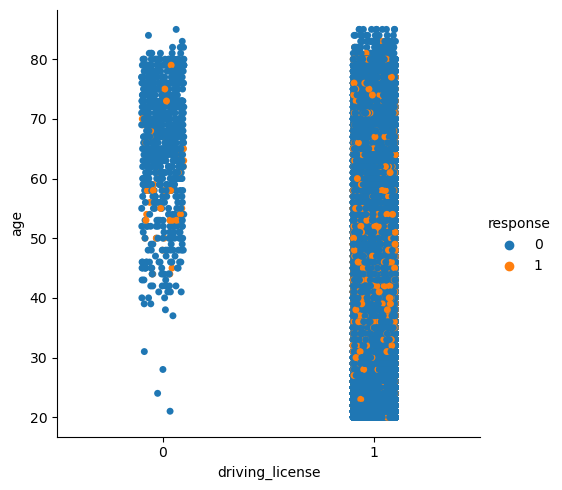

In [23]:
sns.catplot(data=train_df, x="driving_license", y="age", hue="response");

In [24]:
test_df[test_df['driving_license'] == 0].value_counts()

gender  age  driving_license  region_code  previously_insured  vehicle_age  vehicle_damage  annual_premium  policy_sales_channel  vintage
Female  26   0                10.0         0                   < 1 Year     No              19205.0         152.0                 268        1
Male    70   0                28.0         0                   1-2 Year     Yes             26438.0         26.0                  59         1
        68   0                50.0         0                   1-2 Year     Yes             49572.0         66.0                  148        1
        69   0                3.0          1                   1-2 Year     No              2630.0          26.0                  69         1
                              8.0          0                   1-2 Year     No              32093.0         26.0                  111        1
                                                                                                                                            ..
    

In [25]:
#driving licance olmayım sigorta alanlar.
driving=train_df.loc[(train_df.driving_license == 0) & (train_df.response == 1)]
driving.driving_license.value_counts()

0    41
Name: driving_license, dtype: int64

##Vechile Damage distribution

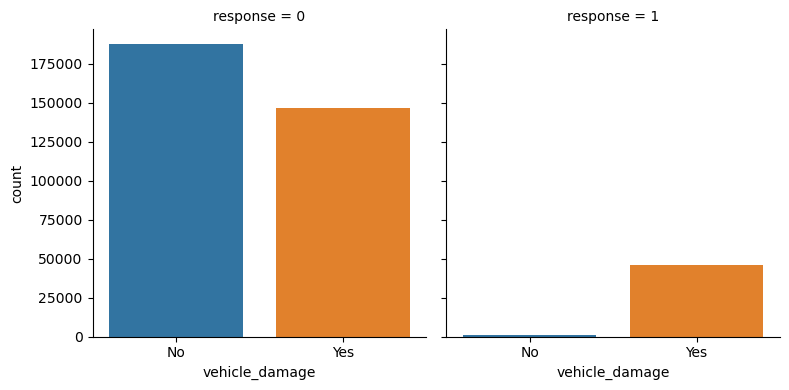

In [26]:
vechiledf=train_df.groupby(['vehicle_damage','response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
vechile = sns.catplot(x="vehicle_damage", y="count",col="response",
                data=vechiledf, kind="bar",
                height=4);

##Vechile Age distribution

In [27]:
vechileage= train_df.groupby(['vehicle_age','response']).response.agg(['count']).reset_index()
vechileage

vehicle_age  response   count
0    1-2 Year         0  165510
1    1-2 Year         1   34806
2    < 1 Year         0  157584
3    < 1 Year         1    7202
4   > 2 Years         0   11305
5   > 2 Years         1    4702

In [28]:
def vehicle_age_distribution(df):
    plt.figure(figsize=(10, 8))
    sns.countplot(x = 'vehicle_age', hue='response', data = df, palette="Dark2")
    plt.xlabel(xlabel = 'vehicle_age', fontdict={'fontsize': 14})
    plt.ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    plt.title('Vehicle_Age', fontdict={'fontsize': 15, 'fontweight':'bold'})

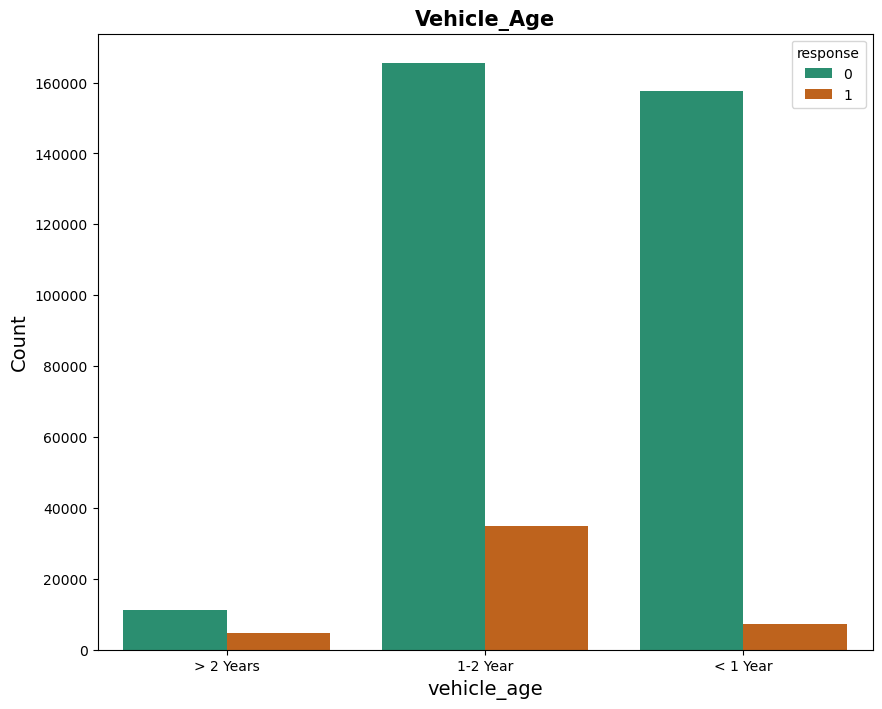

In [29]:
vehicle_age_distribution(train_df)

##Age Group

In [30]:
def age_categorical(df):
     df['Age_Group'] = df['age'].apply(lambda x:'YoungAge' if x >= 20 and x<=45 else 'MiddleAge' if x>45 and x<=65 else 'OldAge')

In [31]:
age_categorical(train_df)

In [32]:
train_df.Age_Group

0          YoungAge
1            OldAge
2         MiddleAge
3          YoungAge
4          YoungAge
            ...    
381104       OldAge
381105     YoungAge
381106     YoungAge
381107       OldAge
381108    MiddleAge
Name: Age_Group, Length: 381109, dtype: object

In [33]:
age_categorical(test_df)

##Policy Sales Channel  distribution

In [34]:
train_df.policy_sales_channel.describe()

count    381109.000000
mean        112.034295
std          54.203995
min           1.000000
25%          29.000000
50%         133.000000
75%         152.000000
max         163.000000
Name: policy_sales_channel, dtype: float64

In [35]:
def get_policy_sales_channel(channel):
    if channel > 152 :
        return 'Channel_C'
    elif channel > 133:
        return 'Channel_B' 
    else:
        return 'Channel_A' 

In [36]:
train_df['Policy_Sales_Channel_Categorical'] =train_df.policy_sales_channel.apply(get_policy_sales_channel)

In [37]:
test_df['Policy_Sales_Channel_Categorical'] =test_df.policy_sales_channel.apply(get_policy_sales_channel)

In [38]:
train_df.Policy_Sales_Channel_Categorical.value_counts()

Channel_A    190602
Channel_B    140113
Channel_C     50394
Name: Policy_Sales_Channel_Categorical, dtype: int64

##Region Code distribution

In [39]:
#Bensersiz değerler
train_df.region_code.value_counts()

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: region_code, dtype: int64

In [40]:
train_df.region_code.describe()

count    381109.000000
mean         26.388807
std          13.229888
min           0.000000
25%          15.000000
50%          28.000000
75%          35.000000
max          52.000000
Name: region_code, dtype: float64

In [41]:
def get_region(region):
    if region > 35 :
        return 'Region_C'
    elif region > 25:
        return 'Region_B' 
    else:
        return 'Region_A'

In [42]:
train_df['Region_Code_Categorical'] =train_df.region_code.apply(get_region)

In [43]:
test_df['Region_Code_Categorical'] =test_df.region_code.apply(get_region)

In [44]:
train_df.Region_Code_Categorical.value_counts()

Region_B    156088
Region_A    130461
Region_C     94560
Name: Region_Code_Categorical, dtype: int64

In [45]:
train_df.vehicle_age.value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: vehicle_age, dtype: int64

In [46]:
def get_vehicle_age(vehicle_age):
    if vehicle_age == '> 2 Years':
        return 3
    elif vehicle_age == '1-2 Year':
        return 2 
    else:
        return 1

In [47]:
train_df['Vehicle_Age'] = train_df.vehicle_age.apply(get_vehicle_age)

In [48]:
test_df['Vehicle_Age'] = test_df.vehicle_age.apply(get_vehicle_age)

In [49]:
train_df['Vehicle_Age'].value_counts()

2    200316
1    164786
3     16007
Name: Vehicle_Age, dtype: int64

In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 16 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id                                381109 non-null  int64  
 1   gender                            381109 non-null  object 
 2   age                               381109 non-null  int64  
 3   driving_license                   381109 non-null  int64  
 4   region_code                       381109 non-null  float64
 5   previously_insured                381109 non-null  int64  
 6   vehicle_age                       381109 non-null  object 
 7   vehicle_damage                    381109 non-null  object 
 8   annual_premium                    381109 non-null  float64
 9   policy_sales_channel              381109 non-null  float64
 10  vintage                           381109 non-null  int64  
 11  response                          381109 non-null  i

In [51]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 14 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   gender                            127037 non-null  object 
 1   age                               127037 non-null  int64  
 2   driving_license                   127037 non-null  int64  
 3   region_code                       127037 non-null  float64
 4   previously_insured                127037 non-null  int64  
 5   vehicle_age                       127037 non-null  object 
 6   vehicle_damage                    127037 non-null  object 
 7   annual_premium                    127037 non-null  float64
 8   policy_sales_channel              127037 non-null  float64
 9   vintage                           127037 non-null  int64  
 10  Age_Group                         127037 non-null  object 
 11  Policy_Sales_Channel_Categorical  127037 non-null  o

In [52]:
def show_volin_categorical(df):
    sns.catplot(y = 'Age_Group', data = df, x='response', kind = 'violin')
    plt.xlabel(xlabel = 'response', fontdict={'fontsize': 14})
    plt.ylabel(ylabel = 'Age_Group', fontdict={'fontsize': 14})
    plt.title('Age Distribution', fontdict={'fontsize': 20, 'fontweight':'bold'})
    
    sns.catplot(y = 'Region_Code_Categorical', data = df, x='response', kind = 'violin')
    plt.xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    plt.ylabel(ylabel = 'Region_Code_Categorical', fontdict={'fontsize': 14})
    plt.title('Region Code Distribution', fontdict={'fontsize': 20, 'fontweight':'bold'})
    
    
    sns.catplot(y = 'Policy_Sales_Channel_Categorical', data = df, x='response', kind = 'violin')
    plt.xlabel(xlabel = 'response', fontdict={'fontsize': 14})
    plt.ylabel(ylabel = 'Policy Sales Channel Categorical', fontdict={'fontsize': 14})
    plt.title('Policy Sales Channel Distribution', fontdict={'fontsize': 20, 'fontweight':'bold'})

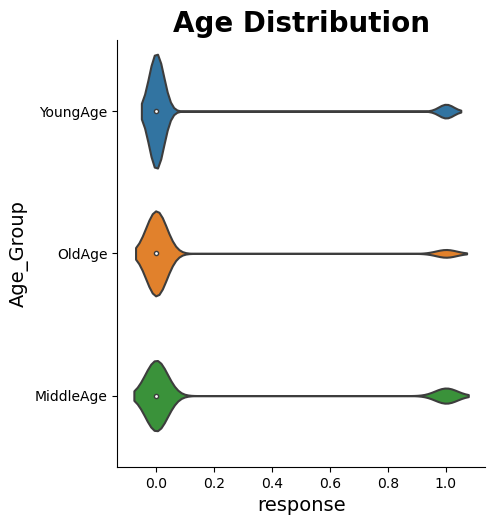

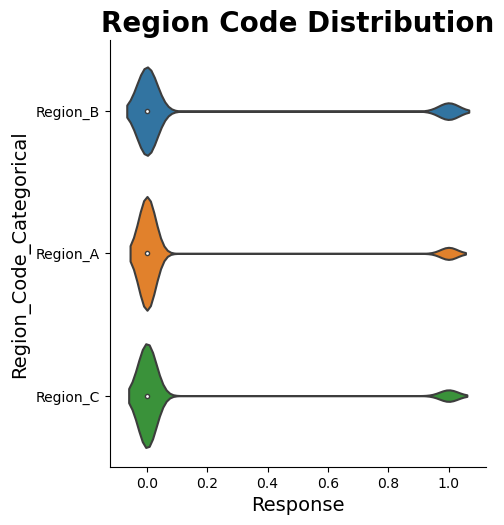

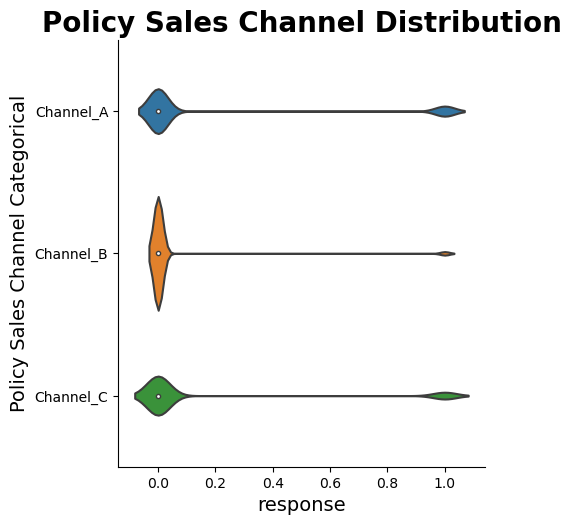

In [53]:
show_volin_categorical(train_df)

##Future Engineering

In [54]:
def outlier_treatment(df):
    Q1=df['annual_premium'].quantile(0.25)
    Q3=df['annual_premium'].quantile(0.75)
    IQR=Q3-Q1

    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    df['Annual_Premium_Clean'] = np.where(df['annual_premium']>Upper_Whisker, Upper_Whisker, df['annual_premium'])

In [55]:
outlier_treatment(train_df)

In [56]:
outlier_treatment(test_df)

In [57]:
train_df.sample(10)

id  gender  age  driving_license  region_code  previously_insured  \
44608    44609  Female   37                1         29.0                   0   
95899    95900  Female   26                1          2.0                   1   
108249  108250    Male   47                1         47.0                   0   
77993    77994    Male   52                1         28.0                   0   
62015    62016  Female   30                1         30.0                   1   
259161  259162    Male   22                1         28.0                   1   
227083  227084  Female   80                1         15.0                   1   
72051    72052    Male   51                1         28.0                   1   
368708  368709  Female   69                1         28.0                   0   
66666    66667  Female   26                1         28.0                   1   

       vehicle_age vehicle_damage  annual_premium  policy_sales_channel  \
44608     1-2 Year            Yes         42714.0                  26.0   
95899     < 1 Year             No         18187.0                 152.0   
108249    1-2 Year            Yes         31239.0                  26.0   
77993     1-2 Year            Yes         36141.0                  26.0   
62015     < 1 Year             No         28920.0                 152.0   
259161    < 1 Year             No         40813.0                 152.0   
227083    1-2 Year             No         24504.0                  26.0   
72051     1-2 Year             No         46323.0                 157.0   
368708    1-2 Year            Yes         49789.0                  25.0   
66666     < 1 Year             No         50451.0                 152.0   

        vintage  response  Age_Group Policy_Sales_Channel_Categorical  \
44608       136         0   YoungAge                        Channel_A   
95899       254         0   YoungAge                        Channel_B   
108249      209         0  MiddleAge                        Channel_A   
77993        20         0  MiddleAge                        Channel_A   
62015        27         0   YoungAge                        Channel_B   
259161      122         0   YoungAge                        Channel_B   
227083       10         0     OldAge                        Channel_A   
72051       150         0  MiddleAge                        Channel_C   
368708      151         0     OldAge                        Channel_A   
66666       107         0   YoungAge                        Channel_B   

       Region_Code_Categorical  Vehicle_Age  Annual_Premium_Clean  
44608                 Region_B            2               42714.0  
95899                 Region_A            1               18187.0  
108249                Region_C            2               31239.0  
77993                 Region_B            2               36141.0  
62015                 Region_B            1               28920.0  
259161                Region_B            1               40813.0  
227083                Region_A            2               24504.0  
72051                 Region_B            2               46323.0  
368708                Region_B            2               49789.0  
66666                 Region_B            1               50451.0

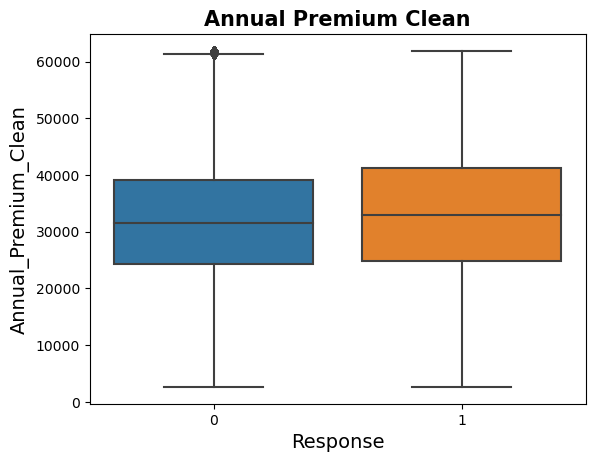

In [58]:
ax=sns.boxplot(y='Annual_Premium_Clean',x='response',data=train_df)
ax.set_xlabel('Response', fontdict={'fontsize': 14})
ax.set_ylabel('Annual_Premium_Clean', fontdict={'fontsize': 14})
ax.axes.set_title('Annual Premium Clean', fontdict={'fontsize': 15,  'fontweight' :'bold'})
plt.show()

In [59]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 17 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id                                381109 non-null  int64  
 1   gender                            381109 non-null  object 
 2   age                               381109 non-null  int64  
 3   driving_license                   381109 non-null  int64  
 4   region_code                       381109 non-null  float64
 5   previously_insured                381109 non-null  int64  
 6   vehicle_age                       381109 non-null  object 
 7   vehicle_damage                    381109 non-null  object 
 8   annual_premium                    381109 non-null  float64
 9   policy_sales_channel              381109 non-null  float64
 10  vintage                           381109 non-null  int64  
 11  response                          381109 non-null  i

In [60]:
train_clean_dataset=['id','age','region_code','vehicle_age','annual_premium','policy_sales_channel','vehicle_age']
train_df.drop(columns=train_clean_dataset,inplace=True)

In [61]:
test_clean_dataset=['age','region_code','vehicle_age','annual_premium','policy_sales_channel','vehicle_age']
test_df.drop(columns=test_clean_dataset,inplace=True)

In [62]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   gender                            381109 non-null  object 
 1   driving_license                   381109 non-null  int64  
 2   previously_insured                381109 non-null  int64  
 3   vehicle_damage                    381109 non-null  object 
 4   vintage                           381109 non-null  int64  
 5   response                          381109 non-null  int64  
 6   Age_Group                         381109 non-null  object 
 7   Policy_Sales_Channel_Categorical  381109 non-null  object 
 8   Region_Code_Categorical           381109 non-null  object 
 9   Vehicle_Age                       381109 non-null  int64  
 10  Annual_Premium_Clean              381109 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 32.

In [63]:
train_df.head()

gender  driving_license  previously_insured vehicle_damage  vintage  \
0    Male                1                   0            Yes      217   
1    Male                1                   0             No      183   
2    Male                1                   0            Yes       27   
3    Male                1                   1             No      203   
4  Female                1                   1             No       39   

   response  Age_Group Policy_Sales_Channel_Categorical  \
0         1   YoungAge                        Channel_A   
1         0     OldAge                        Channel_A   
2         1  MiddleAge                        Channel_A   
3         0   YoungAge                        Channel_B   
4         0   YoungAge                        Channel_B   

  Region_Code_Categorical  Vehicle_Age  Annual_Premium_Clean  
0                Region_B            3               40454.0  
1                Region_A            2               33536.0  
2                Region_B            3               38294.0  
3                Region_A            1               28619.0  
4                Region_C            1               27496.0

##One Hot Encoding

In [64]:
train_df.columns

Index(['gender', 'driving_license', 'previously_insured', 'vehicle_damage',
       'vintage', 'response', 'Age_Group', 'Policy_Sales_Channel_Categorical',
       'Region_Code_Categorical', 'Vehicle_Age', 'Annual_Premium_Clean'],
      dtype='object')

In [65]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   gender                            381109 non-null  object 
 1   driving_license                   381109 non-null  int64  
 2   previously_insured                381109 non-null  int64  
 3   vehicle_damage                    381109 non-null  object 
 4   vintage                           381109 non-null  int64  
 5   response                          381109 non-null  int64  
 6   Age_Group                         381109 non-null  object 
 7   Policy_Sales_Channel_Categorical  381109 non-null  object 
 8   Region_Code_Categorical           381109 non-null  object 
 9   Vehicle_Age                       381109 non-null  int64  
 10  Annual_Premium_Clean              381109 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 32.

In [66]:
encode_colunms=['gender','vehicle_damage','Age_Group','Policy_Sales_Channel_Categorical','Region_Code_Categorical']
train_df=pd.get_dummies(data=train_df, columns=encode_colunms,drop_first=True)
train_df

driving_license  previously_insured  vintage  response  Vehicle_Age  \
0                     1                   0      217         1            3   
1                     1                   0      183         0            2   
2                     1                   0       27         1            3   
3                     1                   1      203         0            1   
4                     1                   1       39         0            1   
...                 ...                 ...      ...       ...          ...   
381104                1                   1       88         0            2   
381105                1                   1      131         0            1   
381106                1                   1      161         0            1   
381107                1                   0       74         0            3   
381108                1                   0      237         0            2   

        Annual_Premium_Clean  gender_Male  vehicle_damage_Yes  \
0                    40454.0            1                   1   
1                    33536.0            1                   0   
2                    38294.0            1                   1   
3                    28619.0            1                   0   
4                    27496.0            0                   0   
...                      ...          ...                 ...   
381104               30170.0            1                   0   
381105               40016.0            1                   0   
381106               35118.0            1                   0   
381107               44617.0            0                   1   
381108               41777.0            1                   0   

        Age_Group_OldAge  Age_Group_YoungAge  \
0                      0                   1   
1                      1                   0   
2                      0                   0   
3                      0                   1   
4                      0                   1   
...                  ...                 ...   
381104                 1                   0   
381105                 0                   1   
381106                 0                   1   
381107                 1                   0   
381108                 0                   0   

        Policy_Sales_Channel_Categorical_Channel_B  \
0                                                0   
1                                                0   
2                                                0   
3                                                1   
4                                                1   
...                                            ...   
381104                                           0   
381105                                           1   
381106                                           0   
381107                                           0   
381108                                           0   

        Policy_Sales_Channel_Categorical_Channel_C  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
...                                            ...   
381104                                           0   
381105                                           0   
381106                                           1   
381107                                           0   
381108                                           0   

        Region_Code_Categorical_Region_B  Region_Code_Categorical_Region_C  
0                                      1                                 0  
1                                      0                                 0  
2                                      1                                 0  
3                                      0                                 0  
4                 

In [67]:
train_df.columns

Index(['driving_license', 'previously_insured', 'vintage', 'response',
       'Vehicle_Age', 'Annual_Premium_Clean', 'gender_Male',
       'vehicle_damage_Yes', 'Age_Group_OldAge', 'Age_Group_YoungAge',
       'Policy_Sales_Channel_Categorical_Channel_B',
       'Policy_Sales_Channel_Categorical_Channel_C',
       'Region_Code_Categorical_Region_B', 'Region_Code_Categorical_Region_C'],
      dtype='object')

In [68]:
test_encode_colunms=['gender','vehicle_damage','Age_Group','Policy_Sales_Channel_Categorical','Region_Code_Categorical']
test_df=pd.get_dummies(data=test_df, columns=test_encode_colunms,drop_first=True)

In [69]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 13 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   driving_license                             127037 non-null  int64  
 1   previously_insured                          127037 non-null  int64  
 2   vintage                                     127037 non-null  int64  
 3   Vehicle_Age                                 127037 non-null  int64  
 4   Annual_Premium_Clean                        127037 non-null  float64
 5   gender_Male                                 127037 non-null  uint8  
 6   vehicle_damage_Yes                          127037 non-null  uint8  
 7   Age_Group_OldAge                            127037 non-null  uint8  
 8   Age_Group_YoungAge                          127037 non-null  uint8  
 9   Policy_Sales_Channel_Categorical_Channel_B  127037 non-null  uint8  
 

In [70]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 14 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   driving_license                             381109 non-null  int64  
 1   previously_insured                          381109 non-null  int64  
 2   vintage                                     381109 non-null  int64  
 3   response                                    381109 non-null  int64  
 4   Vehicle_Age                                 381109 non-null  int64  
 5   Annual_Premium_Clean                        381109 non-null  float64
 6   gender_Male                                 381109 non-null  uint8  
 7   vehicle_damage_Yes                          381109 non-null  uint8  
 8   Age_Group_OldAge                            381109 non-null  uint8  
 9   Age_Group_YoungAge                          381109 non-null  uint8  
 

##Base Line Model

In [71]:
y=train_df.response
X=train_df.drop('response',axis=1)

In [72]:
X.shape

(381109, 13)

In [73]:
y.shape

(381109,)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [75]:
xgb = XGBClassifier().fit(X_train, y_train)

In [76]:
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {round(accuracy, 3)}')

Model Accuracy: 0.877


In [77]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = [12,8], fontsize=18):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to [12,8].
    fontsize: int
        Font size for axes labels. Defaults to 18.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Base Xgb Matrix')
    return fig

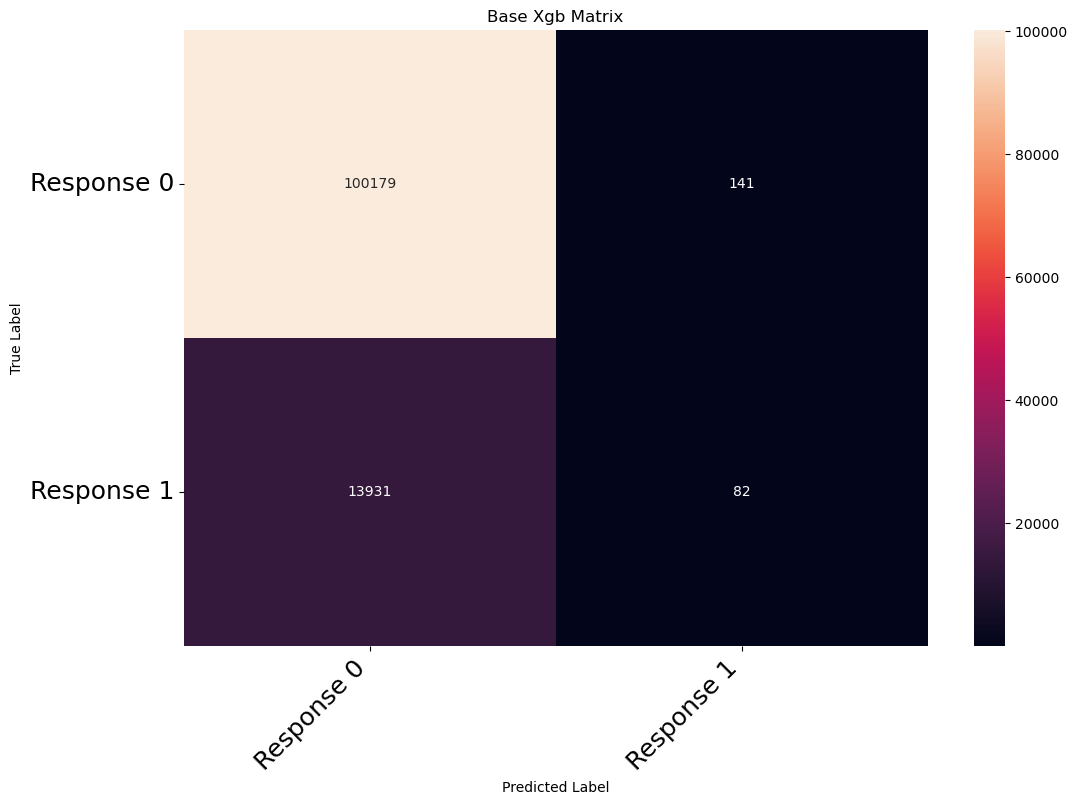

In [78]:
conf_mat =confusion_matrix(y_true=y_test,y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['Response 0', 'Response 1'])

##Smoth data 

In [79]:
X_smoted, y_smoted = SMOTE().fit_resample(X,y)

In [80]:
Counter(y_smoted)

Counter({1: 334399, 0: 334399})

In [81]:
xgb = XGBClassifier().fit(X_smoted,y_smoted)

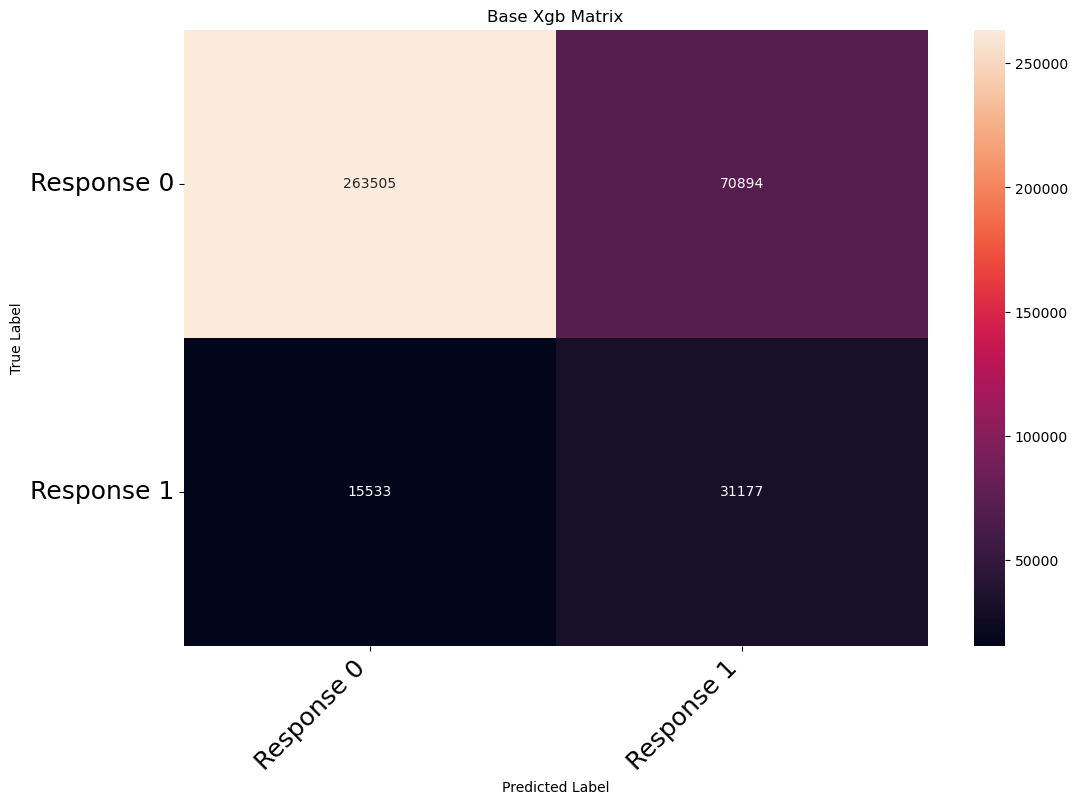

In [82]:
cm = print_confusion_matrix(confusion_matrix(y, xgb.predict(X)), ['Response 0', 'Response 1'])

## Best Model Selection.

In [83]:
X_train, x_test, Y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state=42,stratify=y)

x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.25, random_state=42)

In [84]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

Y_prediction = random_forest.predict(x_val)

acc_random_forest_train = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest_val = round(random_forest.score(x_val, y_val) * 100, 2)

In [85]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

X_train_scaled = std_scale.fit_transform(X_train)
x_train_scaled = std_scale.fit_transform(x_train)
x_val_scaled = std_scale.transform(x_val)
x_test_scaled = std_scale.transform(x_test)

In [86]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train_scaled, y_train)

Y_pred = logreg.predict(x_val_scaled)

acc_log_train = round(logreg.score(x_train_scaled, y_train) * 100, 2)
acc_log_val = round(logreg.score(x_val_scaled, y_val) * 100, 2)

In [87]:
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

Y_pred = knn.predict(x_val_scaled) 

acc_knn_train = round(knn.score(x_train_scaled, y_train) * 100, 2)
acc_knn_val = round(knn.score(x_val_scaled, y_val) * 100, 2)

In [88]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)  

Y_pred = gaussian.predict(x_val)  

acc_gaussian_train = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian_val = round(gaussian.score(x_val, y_val) * 100, 2)

In [89]:
perceptron = Perceptron()
perceptron.fit(x_train_scaled, y_train)

Y_pred = perceptron.predict(x_val_scaled)

acc_perceptron_train = round(perceptron.score(x_train_scaled, y_train) * 100, 2)
acc_perceptron_val = round(perceptron.score(x_val_scaled, y_val) * 100, 2)

In [90]:
linear_svc = LinearSVC(dual=False)
linear_svc.fit(x_train_scaled, y_train)

Y_pred = linear_svc.predict(x_val_scaled)

acc_linear_svc_train = round(linear_svc.score(x_train_scaled, y_train) * 100, 2)
acc_linear_svc_val = round(linear_svc.score(x_val_scaled, y_val) * 100, 2)

In [91]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train) 

Y_pred = decision_tree.predict(x_val) 

acc_decision_tree_train = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree_val = round(decision_tree.score(x_val, y_val) * 100, 2)

In [92]:
xgb_final=XGBClassifier().fit(x_train, y_train)

Y_pred = xgb_final.predict(x_val) 

acc_xgb_train = round(xgb.score(x_train, y_train) * 100, 2)
acc_xgb_val= round(xgb.score(x_val, y_val) * 100, 2)

In [93]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Decision Tree','XGB Classifier'],
    'Train Score': [acc_linear_svc_train, acc_knn_train, acc_log_train, acc_random_forest_train,
                    acc_gaussian_train, acc_perceptron_train, acc_decision_tree_train,acc_xgb_train],
    'Validation Score': [acc_linear_svc_val, acc_knn_val, acc_log_val, acc_random_forest_val,
                         acc_gaussian_val, acc_perceptron_val, acc_decision_tree_val,acc_xgb_val]})

result_df = results.sort_values(by='Validation Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

Train Score  Validation Score
Model                                                 
Support Vector Machines        87.75             87.73
Logistic Regression            87.75             87.73
Perceptron                     85.82             85.77
KNN                            89.46             85.54
Random Forest                  98.55             84.80
Decision Tree                  98.56             82.46
Naive Bayes                    79.50             79.63
XGB Classifier                 77.31             77.30

In [94]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
grid = GridSearchCV(logreg, grid ,cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [95]:
print('Best Score:', grid.best_score_, 'Best Parameters:', grid.best_params_)

Best Score: 0.8774366388542532 Best Parameters: {'C': 0.001, 'penalty': 'l2'}


##Best parameter selection

In [96]:
from sklearn.model_selection import RandomizedSearchCV
C = np.logspace(0, 4, num=10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga','newton-cg', 'lbfgs']

hyperparameters = dict(C=C, penalty=penalty, solver=solver)


randomizedsearch = RandomizedSearchCV(logreg, hyperparameters)
result = randomizedsearch.fit(X, y)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


C:\Users\Sifa\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Sifa\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Sifa\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Sifa\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Sifa\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_ite

Best Score: 0.8774366388584726
Best Hyperparameters: {'solver': 'saga', 'penalty': 'l1', 'C': 10000.0}


C:\Users\Sifa\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [97]:
bestlogreg = LogisticRegression(solver='saga',penalty='l2',C=7.742636826811269)
bestlogreg.fit(x_train_scaled, y_train)

Y_pred = bestlogreg.predict(x_val_scaled)

acc_best_log_train = round(bestlogreg.score(x_train_scaled, y_train) * 100, 2)
acc_best_log_val = round(bestlogreg.score(x_val_scaled, y_val) * 100, 2)
print('Best LogReg Normal Data With Gri Search',acc_best_log_train)
print('Best LogReg Normal Data With Gri Search',acc_best_log_val)

Best LogReg Normal Data With Gri Search 87.75
Best LogReg Normal Data With Gri Search 87.73


In [98]:
randomlogreg = LogisticRegression(solver='saga',penalty='l1',C=7.742636826811269)
randomlogreg.fit(x_train_scaled, y_train)

Y_pred = randomlogreg.predict(x_val_scaled)

random_acc_best_log_train = round(randomlogreg.score(x_train_scaled, y_train) * 100, 2)
random_acc_best_log_val = round(randomlogreg.score(x_val_scaled, y_val) * 100, 2)
print(random_acc_best_log_train)
print(random_acc_best_log_train)

87.75
87.75


In [99]:
gridlogreg = LogisticRegression(solver='liblinear',penalty='l2',C=0.001)
gridlogreg.fit(x_train_scaled, y_train)

Y_pred = gridlogreg.predict(x_val_scaled)

grid_acc_best_log_train = round(gridlogreg.score(x_train_scaled, y_train) * 100, 2)
grid_acc_best_log_val = round(gridlogreg.score(x_val_scaled, y_val) * 100, 2)
print(grid_acc_best_log_train)
print(grid_acc_best_log_train)

87.75
87.75


In [100]:
print(bestlogreg.coef_, bestlogreg.intercept_)
print('Cut-Off Value:', abs(bestlogreg.intercept_ / bestlogreg.coef_))

[[ 0.04582902 -2.05422564 -0.00233956  0.20291043  0.02137226  0.03769069
   0.97119554 -0.20828112  0.15214302 -0.3646257  -0.06701301  0.07890924
  -0.0159292 ]] [-4.2056873]
Cut-Off Value: [[  91.76908625    2.04733463 1797.64161745   20.72681649  196.7825473
   111.58425262    4.33042277   20.19236009   27.64298488   11.53425915
    62.75926332   53.29778097  264.02379011]]


In [101]:
def make_confusion_matrix(model, threshold=0.5): # Ön tanımlı threshold değeri
    y_predict = (model.predict_proba(x_test_scaled)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=120)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['0', '1'],
           yticklabels=['0', '1']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')

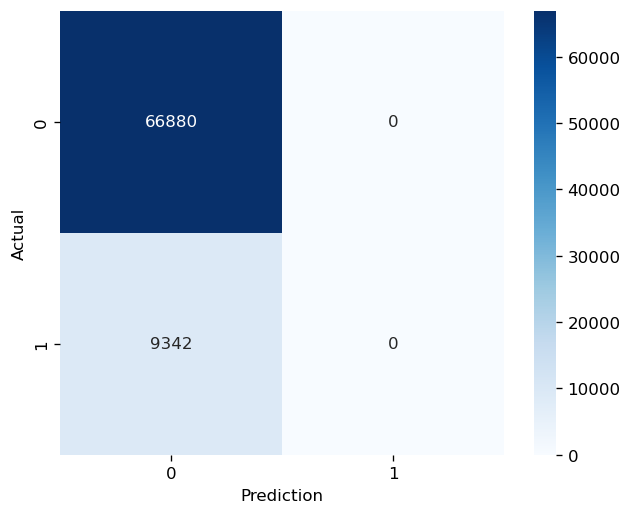

In [102]:
make_confusion_matrix(bestlogreg)

In [103]:
from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(bestlogreg, threshold), threshold=(0.0,1.0,0.05))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…

In [104]:
def make_confusion_matrix(model, threshold=0.15): # Ön tanımlı threshold değeri
    y_predict = (model.predict_proba(x_test_scaled)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=120)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['0', '1'],
           yticklabels=['0', '1']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title('Best Log Regression Matrix')

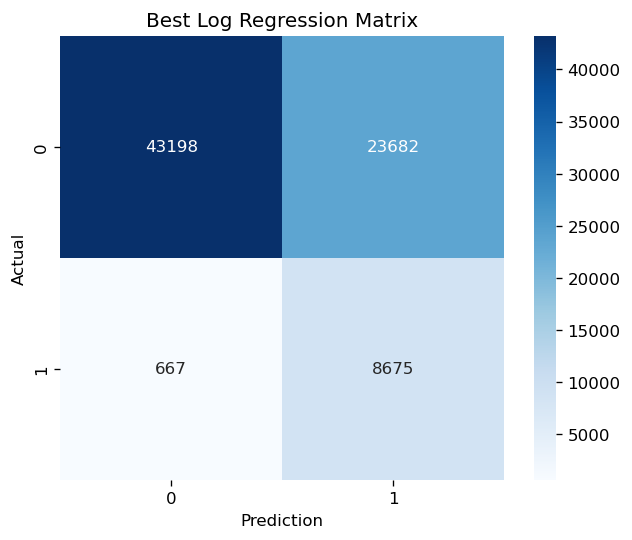

In [105]:
#Treshold değer duzenlemesinden sonra
make_confusion_matrix(gridlogreg)

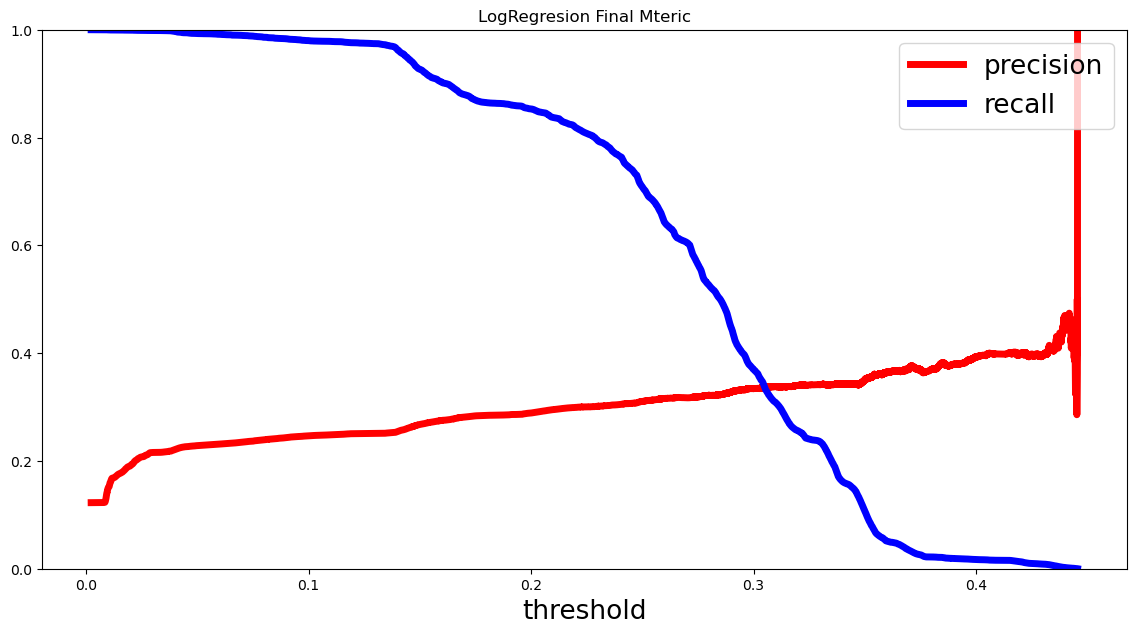

In [106]:
from sklearn.metrics import precision_recall_curve

y_scores = gridlogreg.predict_proba(X_train_scaled)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=[14, 7])
plt.title('LogRegresion Final Mteric')
plot_precision_and_recall(precision, recall, threshold)

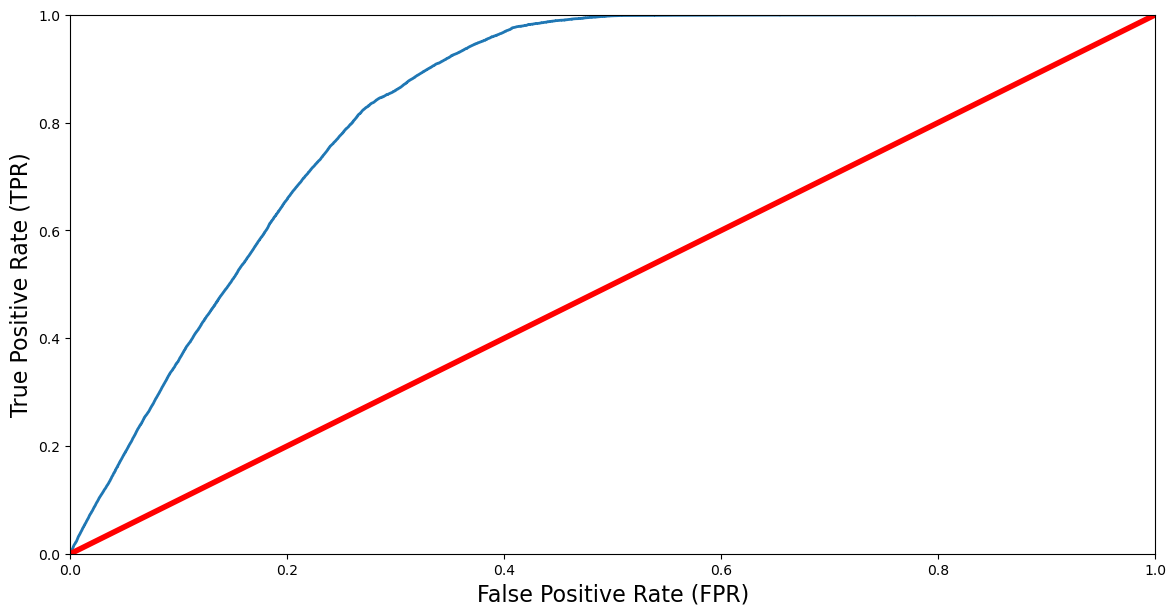

In [107]:
from sklearn.metrics import roc_curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=[14, 7])
plot_roc_curve(false_positive_rate, true_positive_rate)

In [108]:
from sklearn.model_selection import cross_val_score
scores_accuracy = cross_val_score(gridlogreg, X_train_scaled, Y_train, cv=10, scoring = "accuracy")

print("GridLogistic Regression Accuracy Scores:", scores_accuracy)
print("GridLogistic Regression Accuracy Mean:", scores_accuracy.mean())
print("GridLogistic Regression Accuracy Standard Deviation:", scores_accuracy.std())

GridLogistic Regression Accuracy Scores: [0.8774312  0.8774312  0.8774312  0.8774312  0.8774312  0.8774312
 0.8774312  0.87745998 0.87745998 0.87742718]
GridLogistic Regression Accuracy Mean: 0.8774365585855654
GridLogistic Regression Accuracy Standard Deviation: 1.1773050044534145e-05


In [109]:
scores_recall = cross_val_score(gridlogreg, X_train_scaled, Y_train, cv=10, scoring = "recall")

print("GridLogistic Regression Recall Scores:", scores_recall)
print("GridLogistic Regression Recall Mean:", scores_recall.mean())
print("GridLogistic Regression Recall Standard Deviation:", scores_recall.std())

GridLogistic Regression Recall Scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
GridLogistic Regression Recall Mean: 0.0
GridLogistic Regression Recall Standard Deviation: 0.0


In [110]:
scores_precision = cross_val_score(gridlogreg, X_train_scaled, Y_train, cv=10, scoring = "precision")

print("GridLogistic Regression Precision Scores:", scores_precision)
print("GridLogistic Regression Precision Mean:", scores_precision.mean())
print("GridLogistic Regression Precision Standard Deviation:", scores_precision.std())

C:\Users\Sifa\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sifa\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sifa\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\S

GridLogistic Regression Precision Scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
GridLogistic Regression Precision Mean: 0.0
GridLogistic Regression Precision Standard Deviation: 0.0


C:\Users\Sifa\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
y_train

375488    0
43591     0
224703    0
270387    0
77261     0
         ..
80103     0
19393     0
222335    0
216897    0
380272    0
Name: response, Length: 228665, dtype: int64

In [112]:
threshold = 0.15
LR_Grid_ytest_THR = ((gridlogreg.predict_proba(X_train_scaled))>= threshold).astype(int)

In [113]:
LR_Grid_ytest_THR

array([[1, 0],
       [1, 0],
       [1, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 1]])

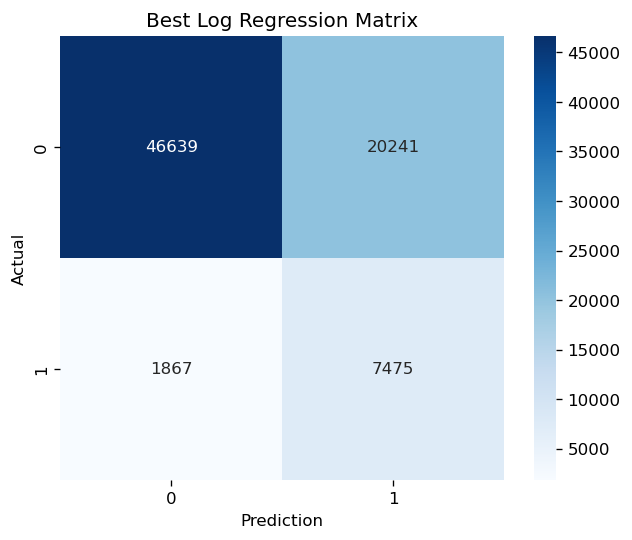

In [114]:
make_confusion_matrix(xgb_final)

In [115]:
scores_accuracy = cross_val_score(xgb_final, X_train_scaled, Y_train, cv=10, scoring = "accuracy")

print("XgBoost Accuracy Scores:", scores_accuracy)
print("XgBoost Regression Accuracy Mean:", scores_accuracy.mean())
print("XgBoost Regression Accuracy Standard Deviation:", scores_accuracy.std())

XgBoost Accuracy Scores: [0.87733281 0.87690643 0.87710322 0.87700482 0.87723441 0.87707042
 0.87700482 0.87745998 0.87667279 0.87713199]
XgBoost Regression Accuracy Mean: 0.877092168535406
XgBoost Regression Accuracy Standard Deviation: 0.00021005915393632513


##Smotedt Data Train split and model









In [116]:
##Smotedt Data Train split and model
X_train_smote, x_test_smote, Y_train_smote, y_test_smote = train_test_split(X_smoted, y_smoted,
                                                    test_size = 0.2, random_state=42)

x_train_smote, x_val_smote, y_train_smote, y_val_smote = train_test_split(X_train_smote, Y_train_smote, test_size = 0.25, random_state=42)

In [117]:
from sklearn.preprocessing import StandardScaler

std_scale_smote = StandardScaler()

X_train_smote_scaled = std_scale.fit_transform(X_train_smote)
x_train_smote_scaled = std_scale.fit_transform(x_train_smote)
x_val_smote_scaled = std_scale.transform(x_val_smote)
x_test_smote_scaled = std_scale.transform(x_test_smote)

In [118]:
random_forest_smote = RandomForestClassifier()
random_forest_smote.fit(x_train_smote, y_train_smote)

Y_prediction_smote = random_forest.predict(x_val_smote)

acc_random_forest_train_smote = round(random_forest_smote.score(x_train_smote, y_train_smote) * 100, 2)
acc_random_forest_val_smote = round(random_forest_smote.score(x_val_smote, y_val_smote) * 100, 2)

In [119]:
logreg_smote = LogisticRegression(solver='liblinear')
logreg_smote.fit(x_train_smote_scaled,y_train_smote)

Y_pred_smote = logreg_smote.predict(x_val_smote_scaled)

acc_log_train_smote = round(logreg_smote.score(x_train_smote_scaled, y_train_smote) * 100, 2)
acc_log_val_smote = round(logreg_smote.score(x_val_smote_scaled, y_val_smote) * 100, 2)

In [120]:
knn_smote = KNeighborsClassifier()
knn_smote.fit(x_train_smote_scaled,y_train_smote)

Y_pred_smote= knn_smote.predict(x_val_smote_scaled) 

acc_knn_train_smote = round(knn_smote.score(x_train_smote_scaled, y_train_smote) * 100, 2)
acc_knn_val_smote = round(knn_smote.score(x_val_smote_scaled, y_val_smote) * 100, 2)

In [121]:
gaussian_smote = GaussianNB()
gaussian_smote.fit(x_train_smote, y_train_smote)  

Y_pred = gaussian_smote.predict(x_val_smote)  

acc_gaussian_train_smote = round(gaussian_smote.score(x_train_smote, y_train_smote) * 100, 2)
acc_gaussian_val_smote = round(gaussian_smote.score(x_val_smote, y_val_smote) * 100, 2)

In [122]:
perceptron_smote = Perceptron()
perceptron_smote.fit(x_train_smote_scaled, y_train_smote)

Y_pred = perceptron_smote.predict(x_val_smote_scaled)

acc_perceptron_train_smote = round(perceptron_smote.score(x_train_smote_scaled, y_train_smote) * 100, 2)
acc_perceptron_val_smote = round(perceptron_smote.score(x_val_smote_scaled, y_val_smote) * 100, 2)

In [123]:
linear_svc_smote = LinearSVC(dual=False)
linear_svc_smote.fit(x_train_smote_scaled, y_train_smote)

Y_pred = linear_svc_smote.predict(x_val_smote_scaled)

acc_linear_svc_train_smote = round(linear_svc_smote.score(x_train_smote_scaled, y_train_smote) * 100, 2)
acc_linear_svc_val_smote = round(linear_svc_smote.score(x_val_smote_scaled, y_val_smote) * 100, 2)


In [124]:
decision_tree_smote = DecisionTreeClassifier() 
decision_tree_smote.fit(x_train_smote, y_train_smote) 

Y_pred = decision_tree_smote.predict(x_val_smote) 

acc_decision_tree_train_smote = round(decision_tree_smote.score(x_train_smote, y_train_smote) * 100, 2)
acc_decision_tree_val_smote = round(decision_tree_smote.score(x_val_smote, y_val_smote) * 100, 2)

In [125]:
xgb_final_smote=XGBClassifier().fit(x_train_smote,y_train_smote)

Y_pred = xgb_final_smote.predict(x_val_smote) 

acc_xgb_train_smote = round(xgb_final_smote.score(x_train_smote, y_train_smote) * 100, 2)
acc_xgb_val_smote= round(xgb_final_smote.score(x_val_smote, y_val_smote) * 100, 2)

In [126]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Decision Tree','Xgboost'],
    'Smote Train Score': [acc_linear_svc_train_smote, acc_knn_train_smote, acc_log_train_smote, acc_random_forest_train_smote,
                    acc_gaussian_train_smote, acc_perceptron_train_smote, acc_decision_tree_train_smote,acc_xgb_train_smote ],
    'Smote Validation Score': [acc_linear_svc_val_smote, acc_knn_val_smote, acc_log_val_smote, acc_random_forest_val_smote,
                         acc_gaussian_val_smote, acc_perceptron_val_smote, acc_decision_tree_val_smote,acc_xgb_val_smote]})

result_df = results.sort_values(by='Smote Validation Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

Smote Train Score  Smote Validation Score
Model                                                             
Random Forest                        98.05                   86.34
Decision Tree                        98.05                   85.21
KNN                                  88.80                   84.64
Xgboost                              85.31                   84.58
Logistic Regression                  82.99                   82.89
Support Vector Machines              83.03                   82.87
Perceptron                           81.21                   81.18
Naive Bayes                          78.94                   78.94

In [127]:
#XGB BOOST SMOTE DATA İLE ACCOURY
scores_accuracy = cross_val_score(xgb_final_smote, X_train_smote_scaled, Y_train_smote, cv=10, scoring = "accuracy")

print("Smote Data Xgboost Accuracy Scores:", scores_accuracy)
print("Smote DataXgboost Accuracy Mean:", scores_accuracy.mean())

Smote Data Xgboost Accuracy Scores: [0.84956265 0.84905801 0.84791791 0.84859076 0.84702078 0.84657222
 0.84720769 0.84885242 0.84655066 0.84641983]
Smote DataXgboost Accuracy Mean: 0.8477752933808457


In [128]:
from sklearn.model_selection import cross_val_score

scores_accuracy = cross_val_score(logreg_smote, X_train_smote_scaled, Y_train_smote, cv=10, scoring = "accuracy")

print("Smote Data Logistic Regression Accuracy Scores:", scores_accuracy)
print("Smote Data Logistic Regression Accuracy Mean:", scores_accuracy.mean())
print("Smote Data Logistic Regression Accuracy Standard Deviation:", scores_accuracy.std())

Smote Data Logistic Regression Accuracy Scores: [0.82956414 0.82947069 0.83120888 0.83062949 0.82885392 0.82692883
 0.82988188 0.83074163 0.82873858 0.82834607]
Smote Data Logistic Regression Accuracy Mean: 0.8294364105200536
Smote Data Logistic Regression Accuracy Standard Deviation: 0.001216046094271093


In [129]:
scores_recall = cross_val_score(logreg_smote, X_train_smote_scaled, Y_train_smote, cv=10, scoring = "recall")

print("Smote Data Logistic Regression Recall Scores:", scores_recall)
print("Smote Data Logistic Regression Recall Mean:", scores_recall.mean())
print("Smote Data Logistic Regression Recall Standard Deviation:", scores_recall.std())

Smote Data Logistic Regression Recall Scores: [0.91335727 0.90905691 0.91892903 0.919116   0.91944953 0.91032497
 0.91570996 0.91679444 0.91772933 0.91746756]
Smote Data Logistic Regression Recall Mean: 0.9157934988998064
Smote Data Logistic Regression Recall Standard Deviation: 0.003507385242761351


In [130]:
scores_precision = cross_val_score(logreg_smote, X_train_smote_scaled, Y_train_smote, cv=10, scoring = "precision")

print("Smote Data Logistic Regression Precision Scores:", scores_precision)
print("Smote Data Logistic Regression Precision Mean:", scores_precision.mean())
print("Smote Data Logistic Regression Precision Standard Deviation:", scores_precision.std())

Smote Data Logistic Regression Precision Scores: [0.78217568 0.78414296 0.78169036 0.78083106 0.77831592 0.78009934
 0.78145843 0.78208441 0.77898045 0.77858526]
Smote Data Logistic Regression Precision Mean: 0.7808363873025472
Smote Data Logistic Regression Precision Standard Deviation: 0.0017552496139123697


In [131]:
scores_f1 = cross_val_score(logreg_smote, X_train_smote_scaled, Y_train_smote, cv=10, scoring = "f1")

print("Smote Data Logistic Regression F1 Scores :", scores_f1)
print("Smote Data Logistic Regression F1 Mean:", scores_f1.mean())
print("Smote Data Logistic Regression F1 Standard Deviation:", scores_f1.std())

Smote Data Logistic Regression F1 Scores : [0.84269178 0.84199224 0.84477217 0.84434902 0.84301658 0.84019604
 0.84327433 0.84409861 0.84268178 0.84234018]
Smote Data Logistic Regression F1 Mean: 0.8429412728779816
Smote Data Logistic Regression F1 Standard Deviation: 0.0012537064080108743


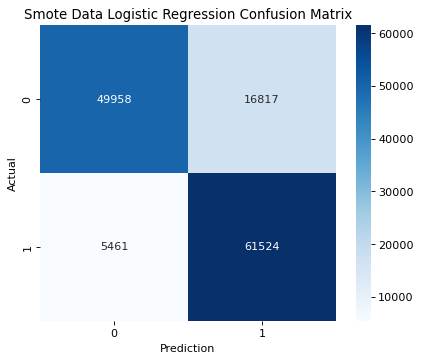

In [132]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

def make_confusion_matrix(model, threshold=0.5): # Ön tanımlı threshold değeri
    y_predict = (model.predict_proba(x_test_smote_scaled)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test_smote, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['0', '1'],
           yticklabels=['0', '1']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title('Smote Data Logistic Regression Confusion Matrix')
make_confusion_matrix(logreg_smote)

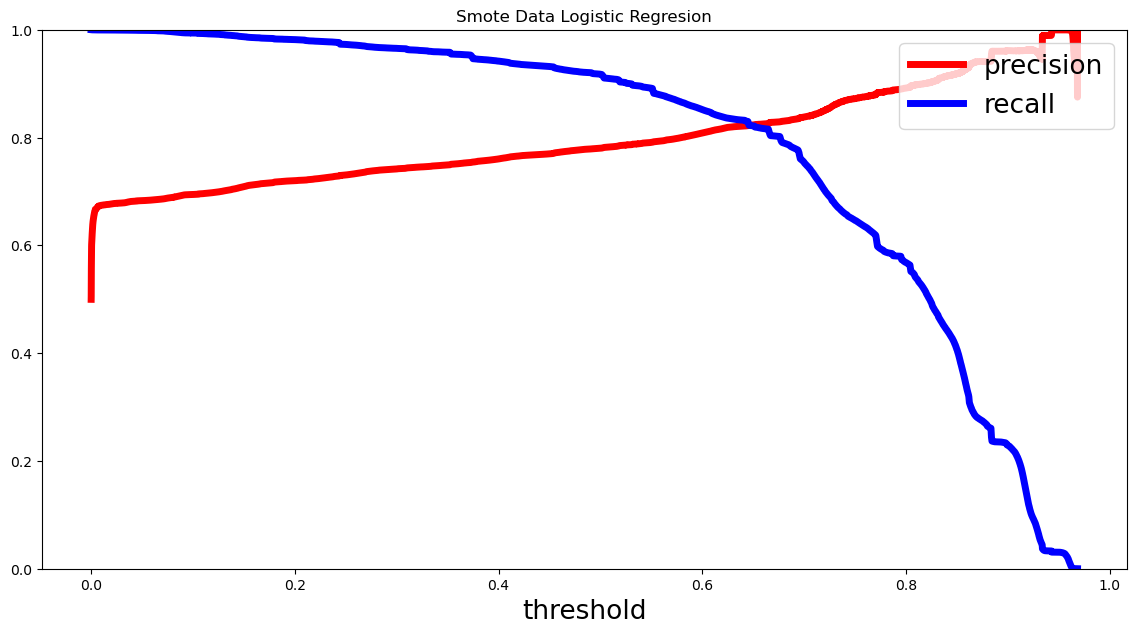

In [133]:
from sklearn.metrics import precision_recall_curve

y_scores = logreg_smote.predict_proba(X_train_smote_scaled)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train_smote, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=[14, 7])
plt.title('Smote Data Logistic Regresion')
plot_precision_and_recall(precision, recall, threshold)

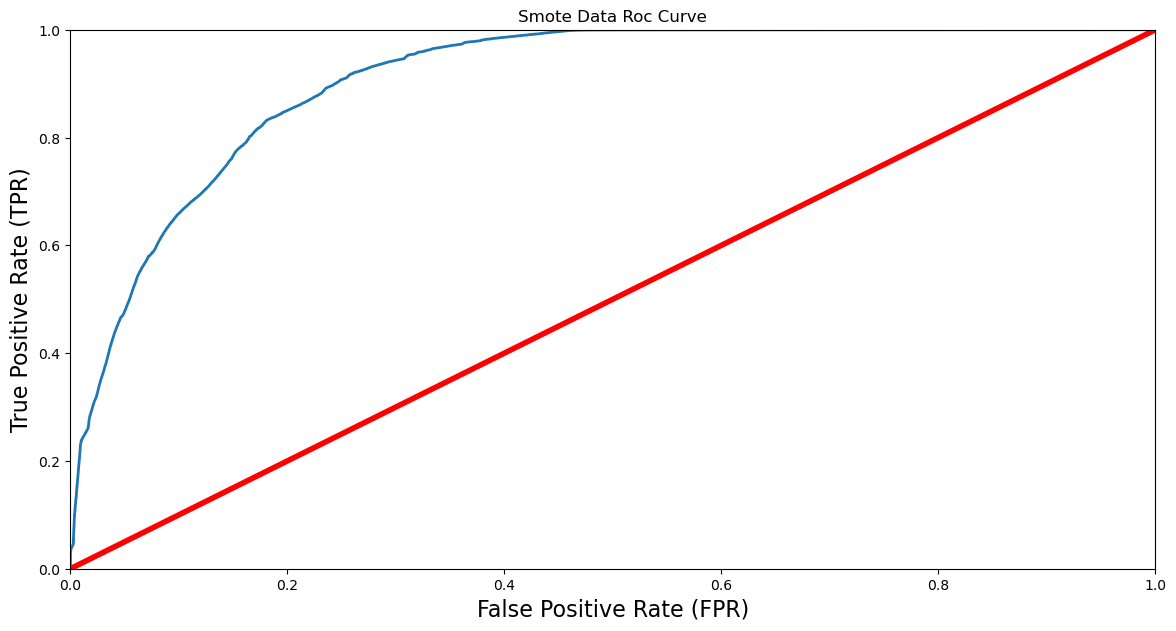

In [134]:
from sklearn.metrics import roc_curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train_smote, y_scores)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
    plt.title('Smote Data Roc Curve')
plt.figure(figsize=[14, 7])
plot_roc_curve(false_positive_rate, true_positive_rate)

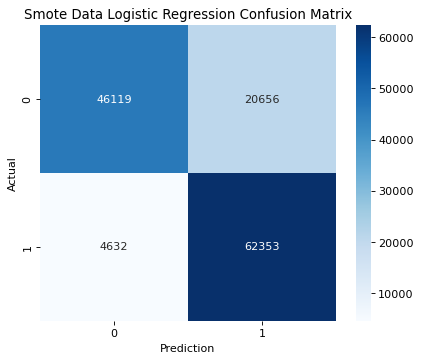

In [135]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

def make_confusion_matrix(model, threshold=0.5): # Ön tanımlı threshold değeri
    y_predict = (model.predict_proba(x_test_smote_scaled)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test_smote, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['0', '1'],
           yticklabels=['0', '1']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title('Smote Data Logistic Regression Confusion Matrix')
make_confusion_matrix(xgb_final_smote)

In [136]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train_smote, y_scores)
print("Smote Data Best Logistic Regression ROC-AUC Score:", r_a_score)

Smote Data Best Logistic Regression ROC-AUC Score: 0.9075928569786573


In [137]:
C = np.logspace(0, 4, num=10)
penalty = ['l1', 'l2','elasticnet']
solver = ['liblinear', 'saga','newton-cg', 'lbfgs']

hyperparameters = dict(C=C, penalty=penalty, solver=solver)


randomizedsearch = RandomizedSearchCV(logreg_smote, hyperparameters)
result = randomizedsearch.fit(X, y)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

C:\Users\Sifa\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Sifa\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Sifa\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\Sifa\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\Sifa\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\s

Best Score: 0.8774366388584726
Best Hyperparameters: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 166.81005372000593}


C:\Users\Sifa\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [138]:
bestlogreg_smote = LogisticRegression(solver='newton-cg', penalty='l2', C=464.15888336127773)
bestlogreg_smote.fit(x_train_smote_scaled,y_train_smote)

Y_pred_smote = bestlogreg_smote.predict(x_val_smote_scaled)

best_acc_log_train_smote = round(bestlogreg_smote.score(x_train_smote_scaled, y_train_smote) * 100, 2)
best_acc_log_val_smote = round(bestlogreg_smote.score(x_val_smote_scaled, y_val_smote) * 100, 2)

In [139]:
print('Smote Data Best Logistic Regression Train acc : ',best_acc_log_train_smote)
print('Smote Data Best Logistic Regression Test acc : ',best_acc_log_val_smote)

Smote Data Best Logistic Regression Train acc :  82.99
Smote Data Best Logistic Regression Test acc :  82.89


In [140]:
scores_accuracy = cross_val_score(bestlogreg_smote, X_train_smote_scaled, Y_train_smote, cv=10, scoring = "accuracy")

print("Smote Data Best Logistic Regression Accuracy Scores:", scores_accuracy)
print("Smote Data Best Logistic Regression Accuracy Mean:", scores_accuracy.mean())
print("Smote Data Best Logistic Regression Accuracy Standard Deviation:", scores_accuracy.std())

C:\Users\Sifa\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Sifa\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Smote Data Best Logistic Regression Accuracy Scores: [0.82958283 0.82947069 0.83120888 0.83062949 0.82885392 0.82689145
 0.82988188 0.83070425 0.82873858 0.82836476]
Smote Data Best Logistic Regression Accuracy Mean: 0.829432672516709
Smote Data Best Logistic Regression Accuracy Standard Deviation: 0.001218398177528668


In [141]:
scores_recall = cross_val_score(bestlogreg_smote, X_train_smote_scaled, Y_train_smote, cv=10, scoring = "recall")

print("Smote Data Logistic Regression Recall Scores:", scores_recall)
print("Smote Data Logistic Regression Recall Mean:", scores_recall.mean())
print("Smote Data Logistic Regression Recall Standard Deviation:", scores_recall.std())

C:\Users\Sifa\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Sifa\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Smote Data Logistic Regression Recall Scores: [0.91339466 0.90905691 0.91892903 0.919116   0.91944953 0.91021278
 0.91570996 0.91675704 0.91772933 0.91750495]
Smote Data Logistic Regression Recall Mean: 0.9157860196081034
Smote Data Logistic Regression Recall Standard Deviation: 0.003523192789687589


In [142]:
scores_precision = cross_val_score(bestlogreg_smote, X_train_smote_scaled, Y_train_smote, cv=10, scoring = "precision")

print("Smote Data Logistic Regression Precision Scores:", scores_precision)
print("Smote Data Logistic Regression Precision Mean:", scores_precision.mean())
print("Smote Data Logistic Regression Precision Standard Deviation:", scores_precision.std())

C:\Users\Sifa\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Sifa\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Smote Data Logistic Regression Precision Scores: [0.78218266 0.78414296 0.78169036 0.78083106 0.77831592 0.7801032
 0.78145843 0.78205251 0.77898045 0.77859228]
Smote Data Logistic Regression Precision Mean: 0.7808349832464156
Smote Data Logistic Regression Precision Standard Deviation: 0.0017524798966884088


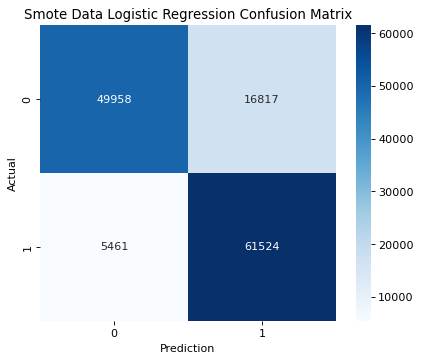

In [143]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

def make_confusion_matrix(model, threshold=0.5): # Ön tanımlı threshold değeri
    y_predict = (model.predict_proba(x_test_smote_scaled)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test_smote, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['0', '1'],
           yticklabels=['0', '1']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title('Smote Data Logistic Regression Confusion Matrix')
make_confusion_matrix(bestlogreg_smote)

#Smote Logisic regression Random search Algoritması uygulandı iyileşme görulemedi.

In [144]:
new_pred = bestlogreg_smote.predict(test_df.values)

In [145]:
test_df["Prediction"] = new_pred # Yaptığımız tahminleri DataFrame'e ekleme
test_df["Prediction"] = test_df["Prediction"].apply(lambda x: str(x).replace("0","Not_insurance"))
test_df["Prediction"] = test_df["Prediction"].apply(lambda x: str(x).replace("1","insurance"))

In [146]:
test_df.Prediction.value_counts()

Not_insurance    127037
Name: Prediction, dtype: int64

In [147]:
test_df.drop(columns="Prediction",inplace=True)

In [148]:
new_pred_xgboost = xgb_final_smote.predict(test_df.values)

In [149]:
test_df["Prediction"] = new_pred_xgboost# Yaptığımız tahminleri DataFrame'e ekleme
test_df["Prediction"] = test_df["Prediction"].apply(lambda x: str(x).replace("0","Not_insurance"))
test_df["Prediction"] = test_df["Prediction"].apply(lambda x: str(x).replace("1","insurance"))

In [150]:
test_df.Prediction.value_counts()

Not_insurance    92899
insurance        34138
Name: Prediction, dtype: int64

In [151]:
from joblib import dump, load

# Modeli pickle kullanarak kaydetme
dump(logreg_smote, 'bestlogreg.pkl')
dump(bestlogreg_smote, 'bestlogreg_smote.pkl')
dump(xgb_final, 'xgbfinal.pkl')

['xgbfinal.pkl']

In [152]:
dump(bestlogreg_smote, 'bestlogreg_smote.pkl')

['bestlogreg_smote.pkl']

In [153]:
dump(bestlogreg, 'bestlogreg.pkl')

['bestlogreg.pkl']

In [154]:
from joblib import dump, load
dump(xgb_final_smote, 'xgbfinal.pkl')

['xgbfinal.pkl']

In [155]:
train_df

driving_license  previously_insured  vintage  response  Vehicle_Age  \
0                     1                   0      217         1            3   
1                     1                   0      183         0            2   
2                     1                   0       27         1            3   
3                     1                   1      203         0            1   
4                     1                   1       39         0            1   
...                 ...                 ...      ...       ...          ...   
381104                1                   1       88         0            2   
381105                1                   1      131         0            1   
381106                1                   1      161         0            1   
381107                1                   0       74         0            3   
381108                1                   0      237         0            2   

        Annual_Premium_Clean  gender_Male  vehicle_damage_Yes  \
0                    40454.0            1                   1   
1                    33536.0            1                   0   
2                    38294.0            1                   1   
3                    28619.0            1                   0   
4                    27496.0            0                   0   
...                      ...          ...                 ...   
381104               30170.0            1                   0   
381105               40016.0            1                   0   
381106               35118.0            1                   0   
381107               44617.0            0                   1   
381108               41777.0            1                   0   

        Age_Group_OldAge  Age_Group_YoungAge  \
0                      0                   1   
1                      1                   0   
2                      0                   0   
3                      0                   1   
4                      0                   1   
...                  ...                 ...   
381104                 1                   0   
381105                 0                   1   
381106                 0                   1   
381107                 1                   0   
381108                 0                   0   

        Policy_Sales_Channel_Categorical_Channel_B  \
0                                                0   
1                                                0   
2                                                0   
3                                                1   
4                                                1   
...                                            ...   
381104                                           0   
381105                                           1   
381106                                           0   
381107                                           0   
381108                                           0   

        Policy_Sales_Channel_Categorical_Channel_C  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
...                                            ...   
381104                                           0   
381105                                           0   
381106                                           1   
381107                                           0   
381108                                           0   

        Region_Code_Categorical_Region_B  Region_Code_Categorical_Region_C  
0                                      1                                 0  
1                                      0                                 0  
2                                      1                                 0  
3                                      0                                 0  
4                 

In [156]:
train_df.Annual_Premium_Clean.min()

2630.0

In [157]:
type(train_df.Annual_Premium_Clean)

pandas.core.series.Series

In [158]:
train_df.Annual_Premium_Clean.max()

61892.5

In [160]:
test_df.columns

Index(['driving_license', 'previously_insured', 'vintage', 'Vehicle_Age',
       'Annual_Premium_Clean', 'gender_Male', 'vehicle_damage_Yes',
       'Age_Group_OldAge', 'Age_Group_YoungAge',
       'Policy_Sales_Channel_Categorical_Channel_B',
       'Policy_Sales_Channel_Categorical_Channel_C',
       'Region_Code_Categorical_Region_B', 'Region_Code_Categorical_Region_C',
       'Prediction'],
      dtype='object')